<a href="https://colab.research.google.com/github/DinaZakaria/Credit-Card-Segmentation/blob/master/ML2_project_Final_Abouda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.7 MB/s 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA, KernelPCA

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist 

from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.mixture import GaussianMixture



> ##### Read Dataframe

In [13]:
df  = pd.read_csv("CC GENERAL.csv")

# 00. EDA 


In [14]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

##### Statistical Basics

In [16]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


##### Check if there is duplicates 
There is no duplicates

In [17]:
df.duplicated().sum()

0

##### Check for *nulls*

- MINIMUM_PAYMENTS contains 313 null values 
- CREDIT_LIMIT contains 1 null value


In [18]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

> ## 01 Preparation

>> ### Remove CUST_ID column

In [19]:
df.drop('CUST_ID', axis = 1, inplace = True)

>> ### Remove Nulls 

In [20]:
df.dropna(inplace = True)

In [21]:
# reset index 
df.reset_index(drop = True, inplace=True)

In [22]:
# Checkf for df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT

In [23]:
# check for no null values
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Since we don't need CUST_ID in our clustering so we can remove it 

In [24]:
# check for columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT

##### Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc27c0b99d0>,
      dtype=object)

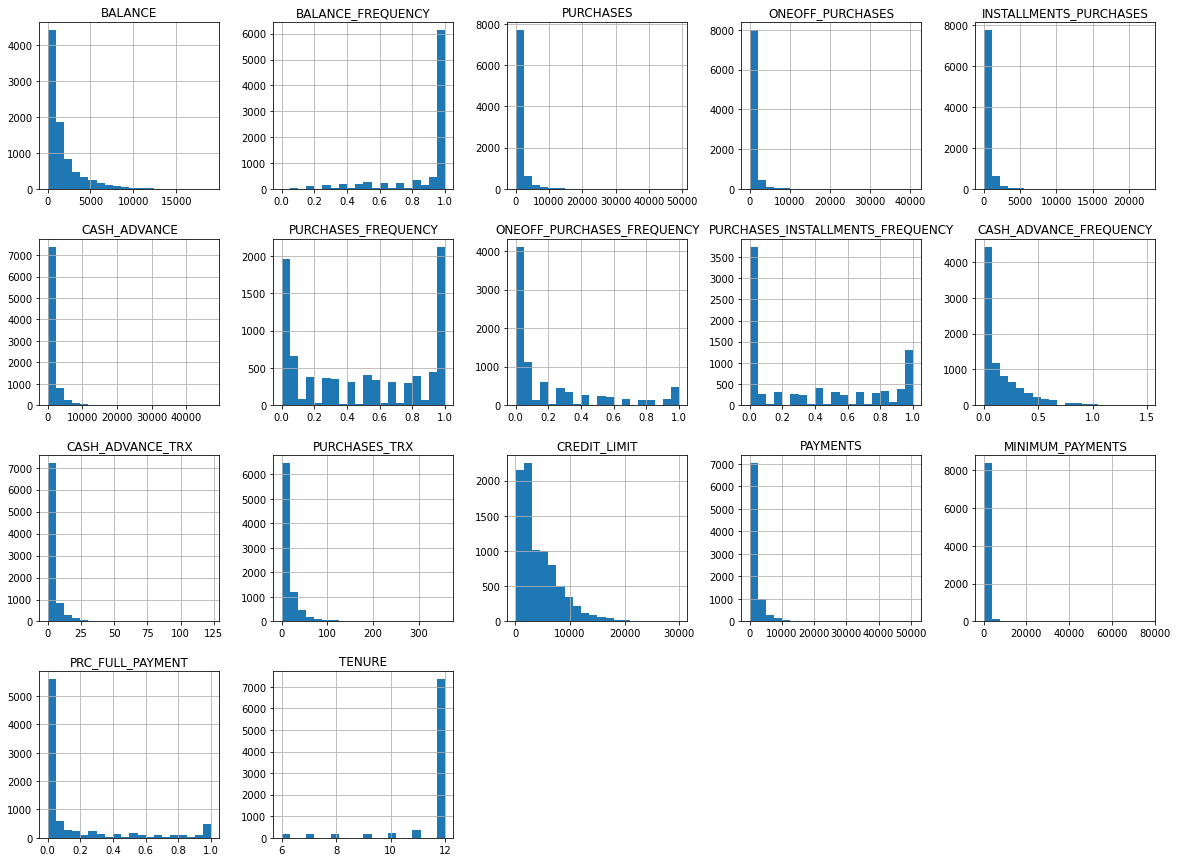

In [30]:
columns = df.columns 
df[columns].hist(bins=20, figsize=(20, 15), layout=(4, 5))


# 01. Scenario 1

> ## 1.1. Split Data

In [33]:
df_clus, df_test = train_test_split(df, test_size=0.2, random_state=42)


> ## 1.2.  Scaling and Transform

>>### 1.2.1. LogTransform 

In [120]:
df_log = df_clus.copy()
columns = df_log.columns
for col in columns:
  df_log [col] = np.log(df_log[col]+1)

In [36]:
df_log.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,6908.0,6.262902,1.896753,0.000000,5.004584,6.832256,7.642610,9.854515
BALANCE_FREQUENCY,6908.0,0.631182,0.126885,0.000000,0.646627,0.693147,0.693147,0.693147
PURCHASES,6908.0,4.902142,2.940798,0.000000,3.583519,5.921913,7.045271,10.800403
ONEOFF_PURCHASES,6908.0,3.230743,3.257014,0.000000,0.000000,3.726891,6.396284,10.615512
INSTALLMENTS_PURCHASES,6908.0,3.356569,3.092859,0.000000,0.000000,4.516818,6.174827,9.486868
CASH_ADVANCE,6908.0,3.369495,3.578670,0.000000,0.000000,0.000000,7.054344,10.760839
PURCHASES_FREQUENCY,6908.0,0.363175,0.277831,0.000000,0.080042,0.405465,0.650588,0.693147
ONEOFF_PURCHASES_FREQUENCY,6908.0,0.161472,0.218525,0.000000,0.000000,0.080042,0.287682,0.693147
PURCHASES_INSTALLMENTS_FREQUENCY,6908.0,0.271050,0.282287,0.000000,0.000000,0.154151,0.559616,0.693147
CASH_ADVANCE_FREQUENCY,6908.0,0.116371,0.158947,0.000000,0.000000,0.000000,0.223144,0.916291


>> ###  1.2.2.  StandardScaler 





In [121]:
df_std = df_clus.copy()
columns = df_std.columns
features = df_std[columns]
df_std[columns] = StandardScaler().fit_transform(df_std[columns].values)


In [45]:
df_std.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,6908.0,-2.036587e-16,1.000072,-3.302146,-0.663454,0.300195,0.727458,1.893696
BALANCE_FREQUENCY,6908.0,-1.686870e-16,1.000072,-4.974781,0.121737,0.488393,0.488393,0.488393
PURCHASES,6908.0,3.780030e-17,1.000072,-1.667064,-0.448422,0.346792,0.728811,2.005812
ONEOFF_PURCHASES,6908.0,1.530012e-16,1.000072,-0.992006,-0.992006,0.152343,0.971985,2.267508
INSTALLMENTS_PURCHASES,6908.0,-1.594298e-17,1.000072,-1.085343,-1.085343,0.375165,0.911281,1.982225
CASH_ADVANCE,6908.0,-1.645727e-17,1.000072,-0.941618,-0.941618,-0.941618,1.029745,2.065538
PURCHASES_FREQUENCY,6908.0,-1.522298e-16,1.000072,-1.307274,-1.019156,0.152226,1.034563,1.187758
ONEOFF_PURCHASES_FREQUENCY,6908.0,7.431487e-17,1.000072,-0.738971,-0.738971,-0.372660,0.577594,2.433191
PURCHASES_INSTALLMENTS_FREQUENCY,6908.0,-1.008008e-16,1.000072,-0.960262,-0.960262,-0.414144,1.022314,1.495382
CASH_ADVANCE_FREQUENCY,6908.0,-1.054294e-17,1.000072,-0.732192,-0.732192,-0.732192,0.671798,5.032988


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc27c484e50>,
      dtype=object)

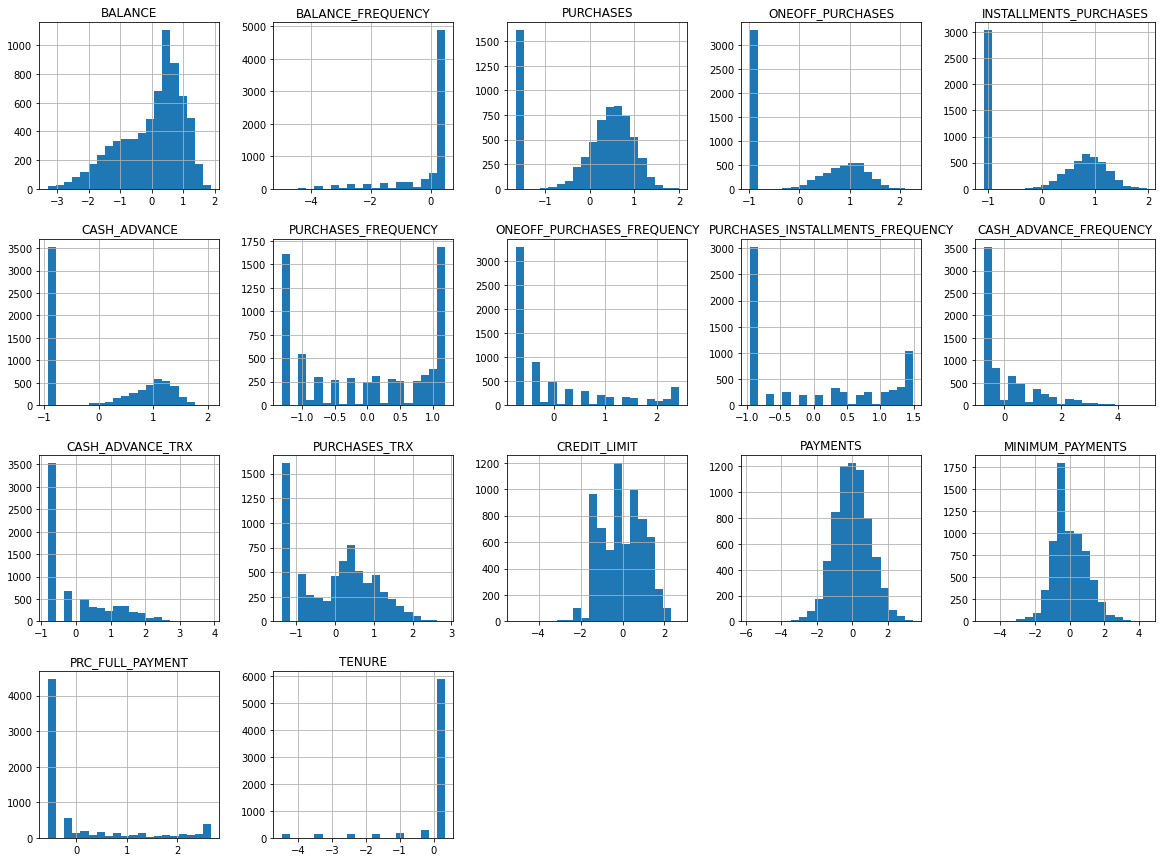

In [46]:
df_std[columns].hist(bins=20, figsize=(20, 15), layout=(4, 5))

>> ### 1.2.3. MinMaxScaler

In [122]:
df_minmax = df_clus.copy()
columns = df_minmax.columns
df_minmax[columns] = MinMaxScaler().fit_transform(df_minmax[columns].values)


In [53]:
df_minmax.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,6908.0,0.635536,0.192476,0.0,0.507847,0.693312,0.775544,1.0
BALANCE_FREQUENCY,6908.0,0.910603,0.183057,0.0,0.932886,1.000000,1.000000,1.0
PURCHASES,6908.0,0.453885,0.272286,0.0,0.331795,0.548305,0.652316,1.0
ONEOFF_PURCHASES,6908.0,0.304342,0.306816,0.0,0.000000,0.351080,0.602541,1.0
INSTALLMENTS_PURCHASES,6908.0,0.353812,0.326015,0.0,0.000000,0.476113,0.650882,1.0
CASH_ADVANCE,6908.0,0.313126,0.332564,0.0,0.000000,0.000000,0.655557,1.0
PURCHASES_FREQUENCY,6908.0,0.523951,0.400825,0.0,0.115477,0.584963,0.938600,1.0
ONEOFF_PURCHASES_FREQUENCY,6908.0,0.232955,0.315265,0.0,0.000000,0.115477,0.415037,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,6908.0,0.391043,0.407255,0.0,0.000000,0.222393,0.807355,1.0
CASH_ADVANCE_FREQUENCY,6908.0,0.127002,0.173468,0.0,0.000000,0.000000,0.243529,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2778db410>,
      dtype=object)

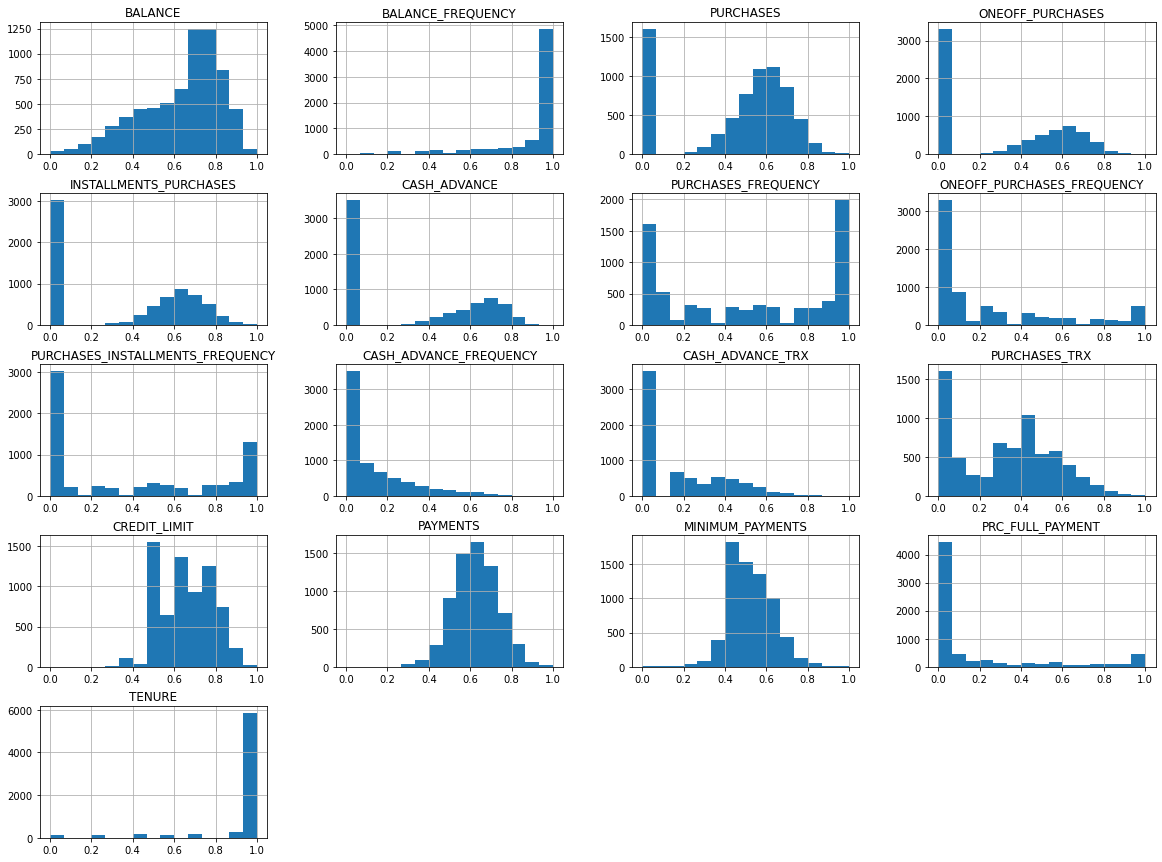

In [55]:
# Histogram 
df_minmax[columns].hist(bins=15, figsize=(20, 15), layout=(5, 4))

>> ### 1.2.4. RobustScaler  

In [123]:
df_robust = df_clus.copy()
columns = df_robust.columns
df_robust[columns] = RobustScaler().fit_transform(df_robust[columns].values)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc26b22bd50>,
      dtype=object)

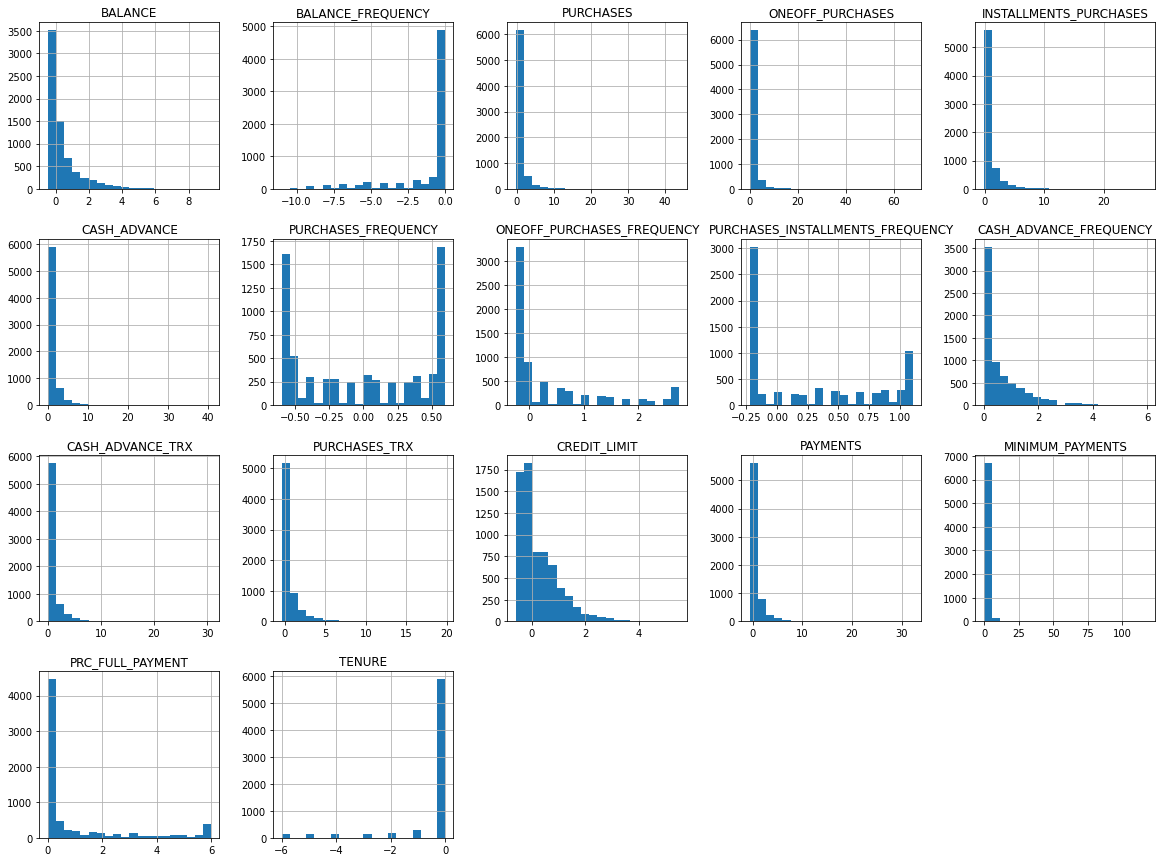

In [124]:
# Histogram 
df_robust[columns].hist(bins=20, figsize=(20, 15), layout=(4, 5))

In [125]:
df_robust.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,6908.0,0.342079,1.067958,-0.478430,-0.401938,0.000000e+00,0.598062,9.357479
BALANCE_FREQUENCY,6908.0,-1.170001,2.296019,-11.000011,-1.000000,0.000000e+00,0.000000,0.000000
PURCHASES,6908.0,0.578770,1.885821,-0.334819,-0.303328,0.000000e+00,0.696672,43.788527
ONEOFF_PURCHASES,6908.0,0.939111,2.762325,-0.067740,-0.067740,5.963112e-18,0.932260,68.025141
INSTALLMENTS_PURCHASES,6908.0,0.672426,1.808038,-0.188832,-0.188832,0.000000e+00,0.811168,27.307372
CASH_ADVANCE,6908.0,0.875828,1.885782,0.000000,0.000000,0.000000e+00,1.000000,40.745195
PURCHASES_FREQUENCY,6908.0,-0.008039,0.482176,-0.600000,-0.500000,0.000000e+00,0.500000,0.600000
ONEOFF_PURCHASES_FREQUENCY,6908.0,0.368826,0.903187,-0.249999,-0.249999,0.000000e+00,0.750001,2.750004
PURCHASES_INSTALLMENTS_FREQUENCY,6908.0,0.265641,0.530659,-0.222223,-0.222223,0.000000e+00,0.777777,1.111111
CASH_ADVANCE_FREQUENCY,6908.0,0.555270,0.813857,0.000000,0.000000,0.000000e+00,1.000000,6.000000


> ## 1.3. Clustering Techniques

using StandardScaled Data

>> ### 1.3.1. KMeans 




>>> #### 1.3.1.1. Applying Elbow Method

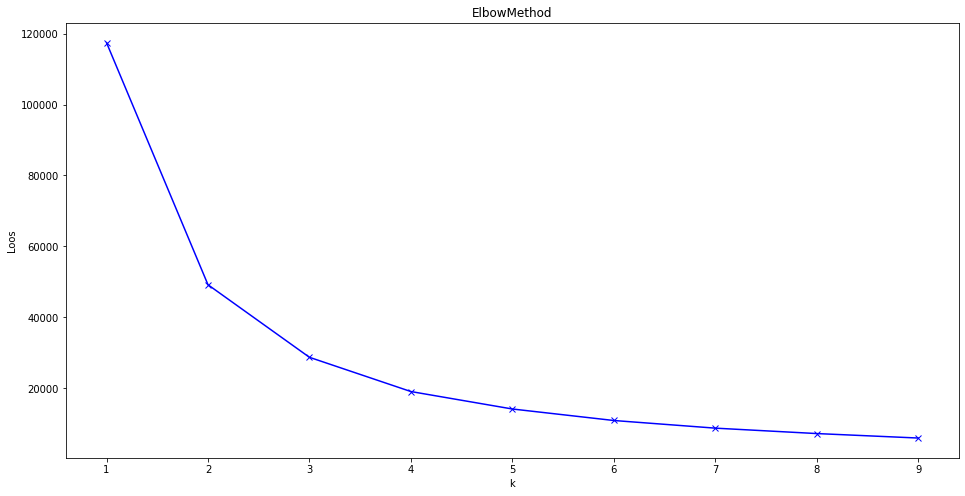

In [126]:
loss = []
K = range(1,10)
for k in K:
    kmean = KMeans(n_clusters=k).fit(df_std)
    loss_int = (kmean.inertia_)/k
    loss.append(loss_int)
plt.figure(figsize=(16,8))
plt.plot(K, loss, 'bx-')
plt.xlabel('k')
plt.ylabel('Loos')
plt.title('ElbowMethod')
plt.show()


Observing from the graph:
k = 3

In [127]:
k_kmeans = 3

>>> #### 3.1.1.2. KMeans



In [128]:
df_kmeans = df_clus.copy()
kmean = KMeans(n_clusters=k_kmeans)
labels = kmean.fit_predict(df_std)


In [129]:
df_kmeans['Labels'] = labels
df_kmeans

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Labels
7340,252.174753,1.000000,411.01,411.01,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,28,1000.0,459.467285,188.121403,0.000000,12,0
8189,28.244252,0.545455,320.00,0.00,320.00,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,1000.0,551.233491,153.094069,0.400000,12,0
6692,942.555708,1.000000,150.00,0.00,150.00,1066.604854,0.333333,0.000000,0.250000,0.083333,4,6,1200.0,1445.633559,492.370581,0.000000,12,0
5213,1064.308102,1.000000,1067.32,242.38,824.94,3608.381870,0.833333,0.250000,0.666667,0.083333,1,13,6000.0,4770.998795,289.339838,0.083333,12,0
5356,200.574081,1.000000,675.90,675.90,0.00,0.000000,0.416667,0.416667,0.000000,0.000000,0,8,7500.0,753.502654,308.604961,0.083333,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1700.753811,1.000000,0.00,0.00,0.00,624.480873,0.000000,0.000000,0.000000,0.500000,9,0,2000.0,418.596666,434.688783,0.000000,12,1
5191,1184.971992,1.000000,0.00,0.00,0.00,4743.715012,0.000000,0.000000,0.000000,0.500000,10,0,3000.0,2355.267462,268.140818,0.000000,12,1
5390,20.700474,0.857143,94.98,0.00,94.98,0.000000,0.857143,0.000000,0.714286,0.000000,0,6,1000.0,86.167530,104.771473,0.500000,7,0
860,5980.582470,1.000000,0.00,0.00,0.00,12008.080790,0.000000,0.000000,0.000000,0.416667,30,0,11000.0,9736.897362,1596.893256,0.083333,12,1


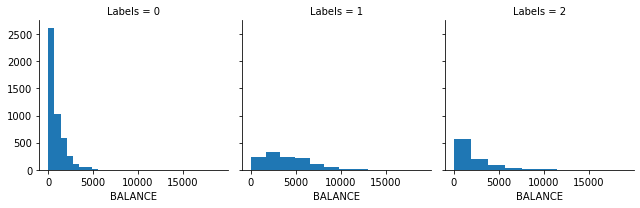

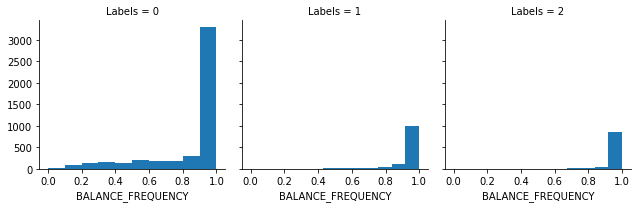

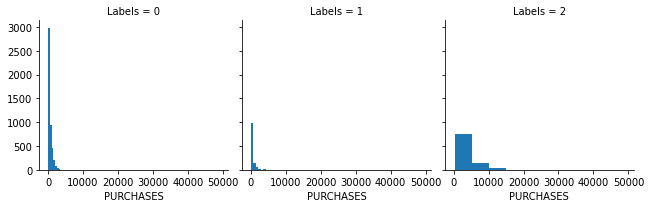

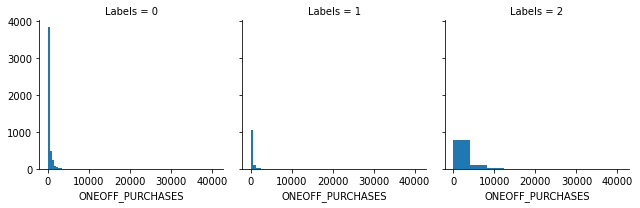

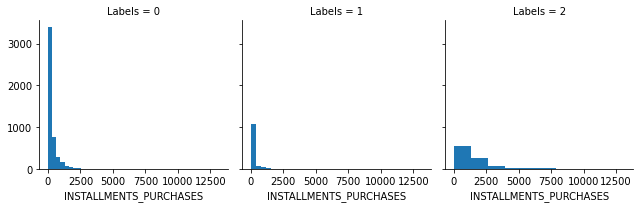

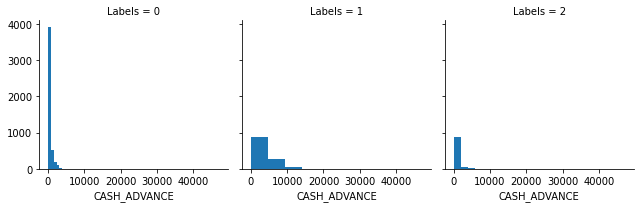

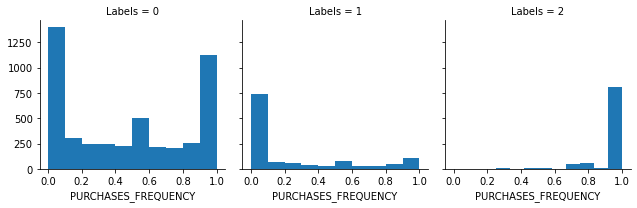

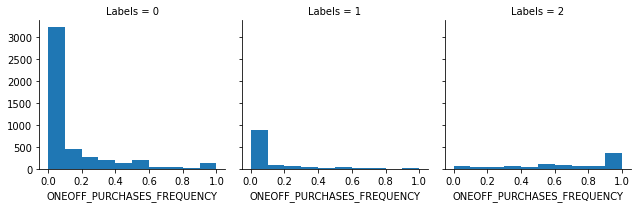

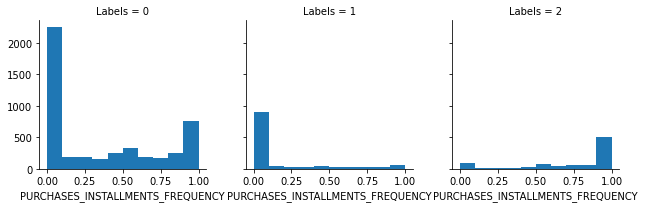

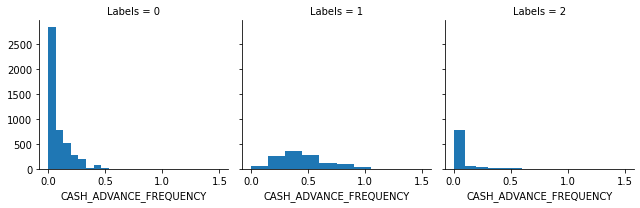

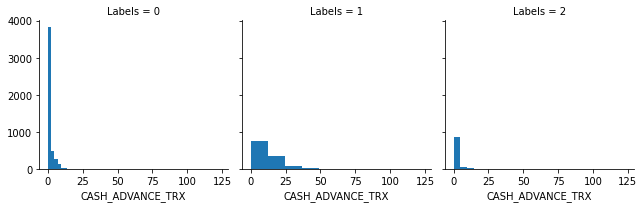

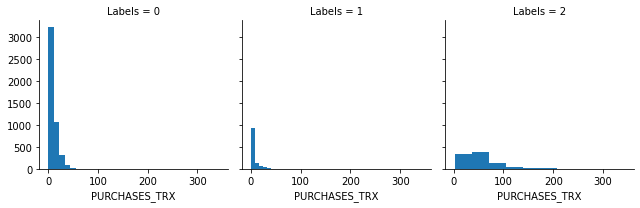

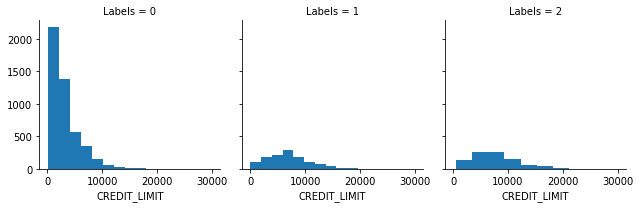

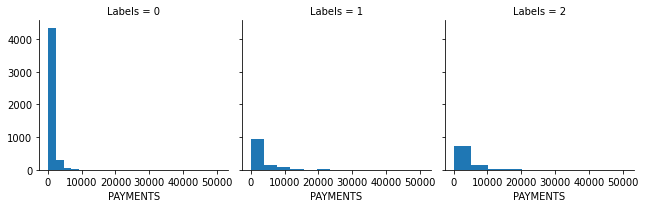

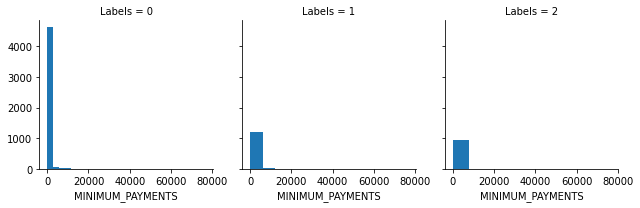

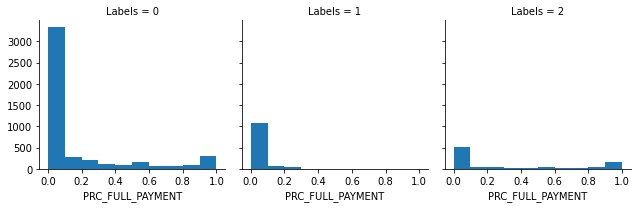

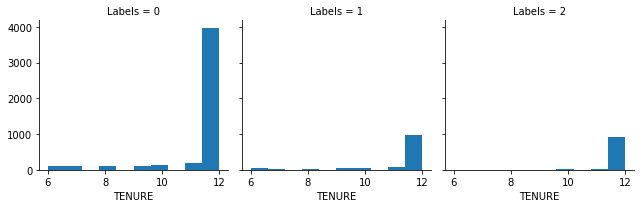

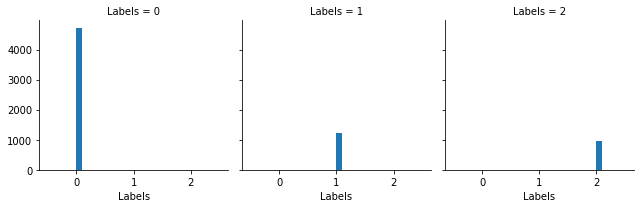

In [130]:
for c in df_kmeans:
    grid= sns.FacetGrid(df_kmeans, col='Labels')
    grid.map(plt.hist, c)

In [131]:
silhouette_score(df_std, df_kmeans['Labels'], metric='euclidean')

0.2512590980139181

>>> #### 3.1.1.3. Visualization for Kmeans using PCA

In [132]:
df_nor = normalize(df_std)
pca_nor = PCA(n_components = 2).fit_transform(df_nor)
PCA_df = pd.DataFrame(pca_nor, columns = ["C1", "C2"])
PCA_df

,C1,C2
0,0.250176,-0.132050
1,0.063435,-0.712255
2,-0.503073,-0.371751
3,0.526230,0.367312
4,-0.083936,-0.142072
...,...,...
6903,-0.748563,0.217100
6904,-0.691221,0.442595
6905,0.262349,-0.305260
6906,-0.326008,0.816965


In [133]:
PCA_df.shape


(6908, 2)

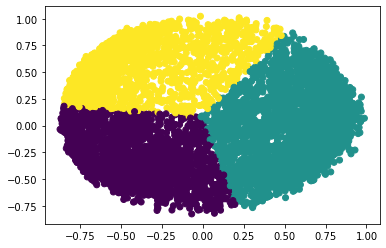

In [134]:
kmean = KMeans(n_clusters=k_kmeans)
labels = kmean.fit_predict(pca_nor)
plt.scatter(PCA_df['C1'], PCA_df['C2'],
            c = labels) 
plt.show()

In [135]:
silhouette_score(PCA_df, labels, metric='euclidean')

0.45567296373440636

>>> #### 3.1.1.3. Visualization for Kmeans using PCA

In [136]:
kpca_nor = KernelPCA(n_components = 2, kernel = 'rbf').fit_transform(df_nor)
KPCA_df = pd.DataFrame(kpca_nor, columns = ["C1", "C2"])
KPCA_df

,C1,C2
0,0.081323,-0.041090
1,0.021379,-0.231134
2,-0.164563,-0.121490
3,0.169661,0.117999
4,-0.027378,-0.045678
...,...,...
6903,-0.243573,0.072435
6904,-0.223610,0.146178
6905,0.085716,-0.097631
6906,-0.104433,0.265594


In [137]:
KPCA_df.shape
#columns.shape

(6908, 2)

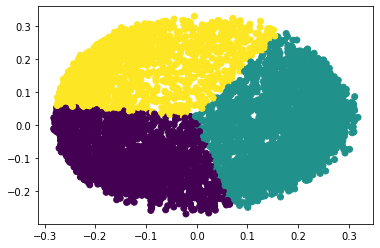

In [138]:
kmean = KMeans(n_clusters=k_kmeans)
labels = kmean.fit_predict(kpca_nor)
plt.scatter(KPCA_df['C1'], KPCA_df['C2'],
            c = labels) 
plt.show()

In [139]:
silhouette_score(KPCA_df, labels, metric='euclidean')

0.4561735096562826

>>> #### 3.1.1.3. Visualization for Kmeans using TSNE

In [140]:
tsne_nor = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(df_nor)
TSNE_df = pd.DataFrame(tsne_nor, columns = ["TSNE1", "TSNE2"])
TSNE_df

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6908 samples in 0.001s...
[t-SNE] Computed neighbors for 6908 samples in 1.217s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6908
[t-SNE] Computed conditional probabilities for sample 2000 / 6908
[t-SNE] Computed conditional probabilities for sample 3000 / 6908
[t-SNE] Computed conditional probabilities for sample 4000 / 6908
[t-SNE] Computed conditional probabilities for sample 5000 / 6908
[t-SNE] Computed conditional probabilities for sample 6000 / 6908
[t-SNE] Computed conditional probabilities for sample 6908 / 6908
[t-SNE] Mean sigma: 0.175810
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.197601
[t-SNE] KL divergence after 300 iterations: 2.211008


,TSNE1,TSNE2
0,-2.901630,1.488101
1,10.944064,2.131367
2,3.595988,-0.833324
3,-8.244465,1.422749
4,-1.307833,-1.972086
...,...,...
6903,-6.396118,-9.644395
6904,-6.108976,-6.391017
6905,6.096106,2.091468
6906,-6.389132,-2.590356


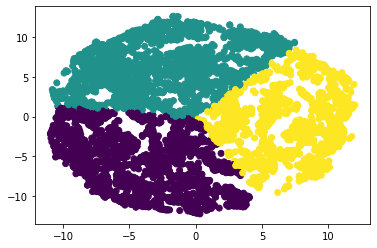

In [141]:
kmeans = KMeans(n_clusters=k_kmeans)
labels = kmeans.fit_predict(TSNE_df)
plt.scatter(TSNE_df['TSNE1'], TSNE_df['TSNE2'],
            c = labels) 
plt.show()

In [142]:
silhouette_score(TSNE_df, labels, metric='euclidean')

0.38952565

>> ### 1.3.2. Kmedoids 

>>> #### 1.3.2.1. Applying Elbow Method

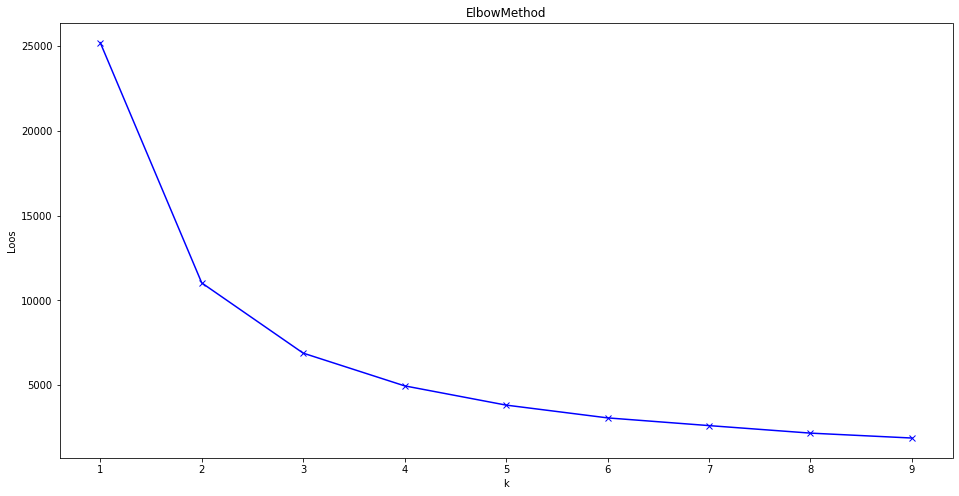

In [143]:
loss = []
K = range(1,10)
for k in K:
    kmean = KMedoids(n_clusters=k).fit(df_std)
    loss_int = (kmean.inertia_)/k
    loss.append(loss_int)
plt.figure(figsize=(16,8))
plt.plot(K, loss, 'bx-')
plt.xlabel('k')
plt.ylabel('Loos')
plt.title('ElbowMethod')
plt.show()


Observing from the graph:
k = 3

In [144]:
k_kmediod = 3

>>> #### 3.1.1.2. KMeans



In [145]:
df_kmediod = df_clus.copy()
kmedoid = KMedoids(n_clusters=k_kmediod)
labels = kmedoid.fit_predict(df_std)


In [146]:
df_kmediod['Labels'] = labels
df_kmediod

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Labels
7340,252.174753,1.000000,411.01,411.01,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,28,1000.0,459.467285,188.121403,0.000000,12,0
8189,28.244252,0.545455,320.00,0.00,320.00,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,1000.0,551.233491,153.094069,0.400000,12,2
6692,942.555708,1.000000,150.00,0.00,150.00,1066.604854,0.333333,0.000000,0.250000,0.083333,4,6,1200.0,1445.633559,492.370581,0.000000,12,1
5213,1064.308102,1.000000,1067.32,242.38,824.94,3608.381870,0.833333,0.250000,0.666667,0.083333,1,13,6000.0,4770.998795,289.339838,0.083333,12,0
5356,200.574081,1.000000,675.90,675.90,0.00,0.000000,0.416667,0.416667,0.000000,0.000000,0,8,7500.0,753.502654,308.604961,0.083333,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1700.753811,1.000000,0.00,0.00,0.00,624.480873,0.000000,0.000000,0.000000,0.500000,9,0,2000.0,418.596666,434.688783,0.000000,12,1
5191,1184.971992,1.000000,0.00,0.00,0.00,4743.715012,0.000000,0.000000,0.000000,0.500000,10,0,3000.0,2355.267462,268.140818,0.000000,12,1
5390,20.700474,0.857143,94.98,0.00,94.98,0.000000,0.857143,0.000000,0.714286,0.000000,0,6,1000.0,86.167530,104.771473,0.500000,7,0
860,5980.582470,1.000000,0.00,0.00,0.00,12008.080790,0.000000,0.000000,0.000000,0.416667,30,0,11000.0,9736.897362,1596.893256,0.083333,12,1


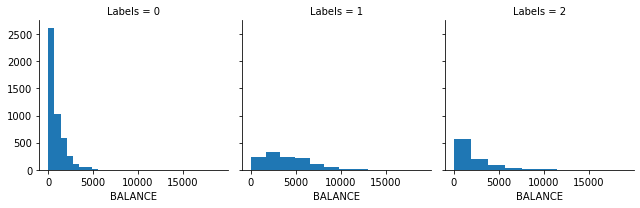

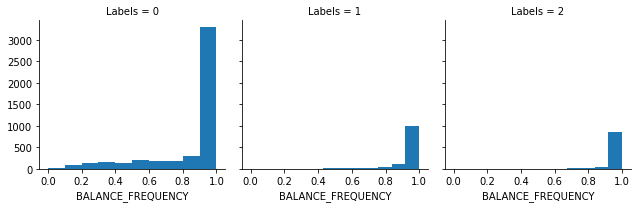

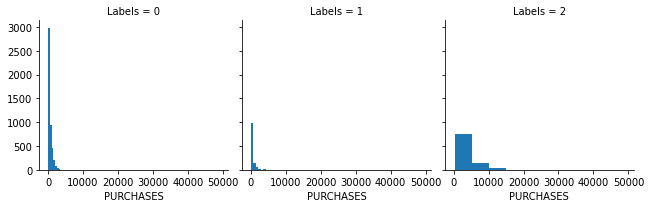

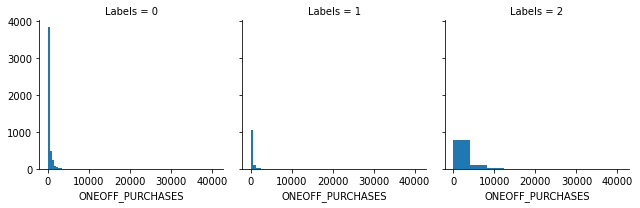

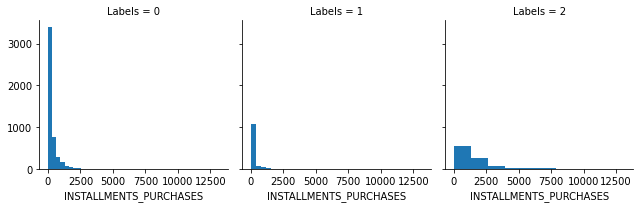

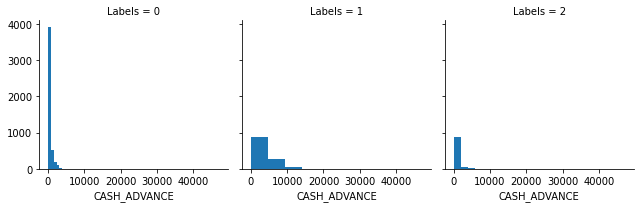

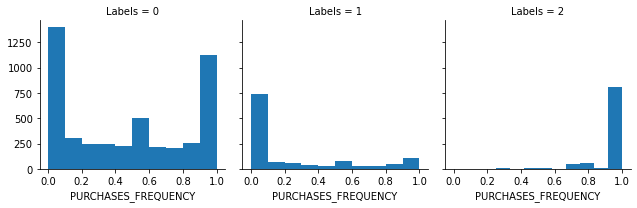

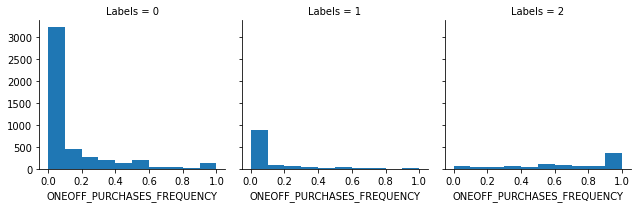

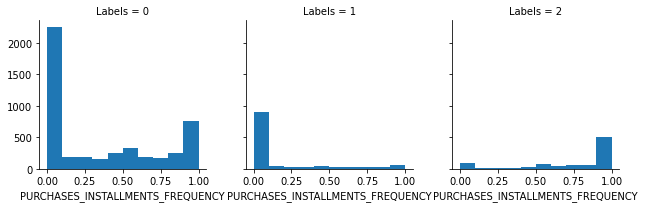

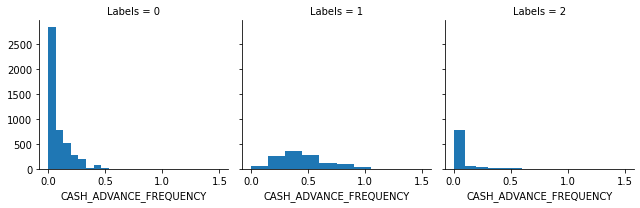

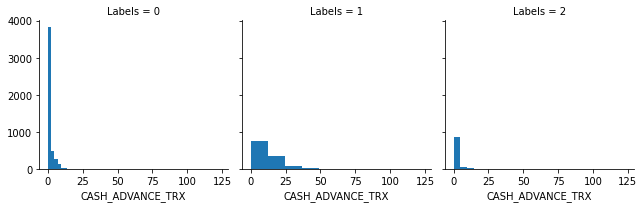

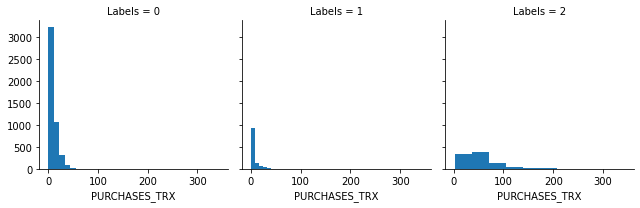

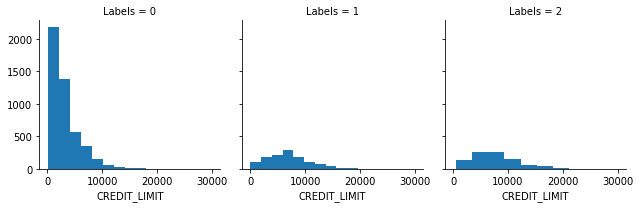

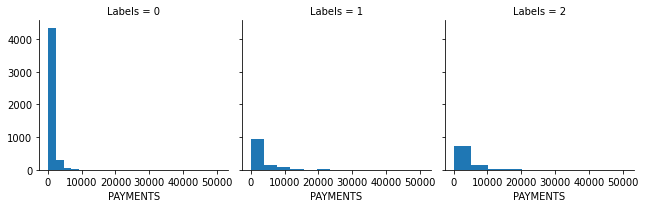

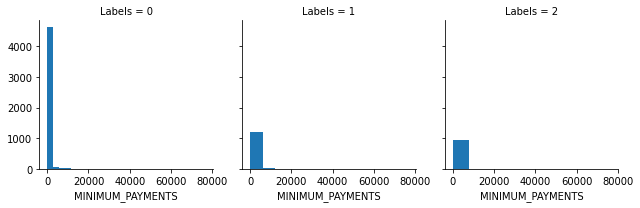

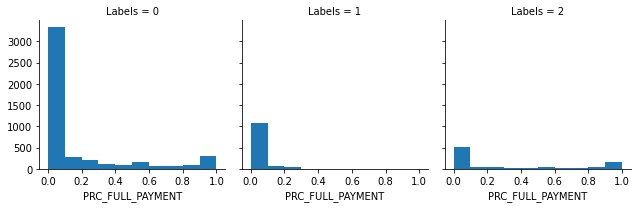

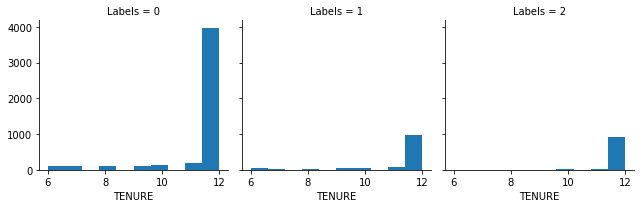

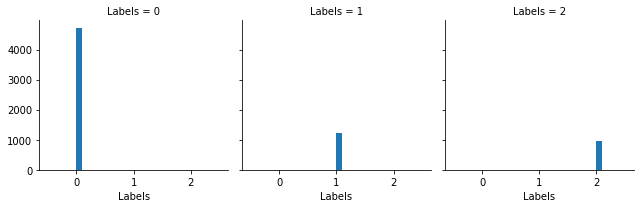

In [147]:
for c in df_kmediod:
    grid= sns.FacetGrid(df_kmeans, col='Labels')
    grid.map(plt.hist, c)

In [148]:
silhouette_score(df_std, df_kmediod['Labels'], metric='euclidean')

0.16186034845553052

>>> #### 3.1.1.3. Visualization for Kmeans using PCA

In [149]:
df_nor = normalize(df_std)
pca_nor = PCA(n_components = 2).fit_transform(df_nor)
PCA_df = pd.DataFrame(pca_nor, columns = ["C1", "C2"])
PCA_df

,C1,C2
0,0.250176,-0.132051
1,0.063435,-0.712253
2,-0.503073,-0.371751
3,0.526230,0.367306
4,-0.083936,-0.142079
...,...,...
6903,-0.748563,0.217100
6904,-0.691221,0.442597
6905,0.262349,-0.305260
6906,-0.326008,0.816966


In [150]:
PCA_df.shape


(6908, 2)

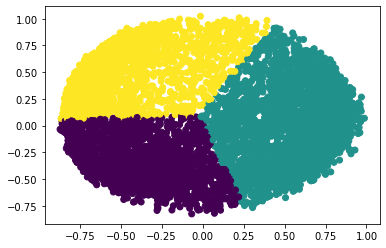

In [151]:
kmedoid = KMedoids(n_clusters=k_kmediod)
labels = kmedoid.fit_predict(pca_nor)
plt.scatter(PCA_df['C1'], PCA_df['C2'],
            c = labels) 
plt.show()

In [152]:
silhouette_score(PCA_df, labels, metric='euclidean')

0.45014609891946583

>>> #### 3.1.1.3. Visualization for Kmeans using PCA

In [153]:
kpca_nor = KernelPCA(n_components = 2, kernel = 'rbf').fit_transform(df_nor)
KPCA_df = pd.DataFrame(kpca_nor, columns = ["C1", "C2"])
KPCA_df

,C1,C2
0,0.081323,-0.041090
1,0.021379,-0.231134
2,-0.164563,-0.121490
3,0.169661,0.117999
4,-0.027378,-0.045678
...,...,...
6903,-0.243573,0.072435
6904,-0.223610,0.146178
6905,0.085716,-0.097631
6906,-0.104433,0.265594


In [154]:
KPCA_df.shape
#columns.shape

(6908, 2)

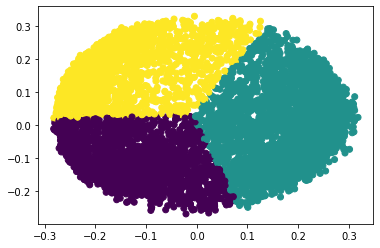

In [155]:
kmedoid = KMedoids(n_clusters=k_kmediod)
labels = kmedoid.fit_predict(kpca_nor)
plt.scatter(KPCA_df['C1'], KPCA_df['C2'],
            c = labels) 
plt.show()

In [156]:
silhouette_score(KPCA_df, labels, metric='euclidean')

0.4514014490461514

>>> #### 3.1.1.3. Visualization for Kmeans using TSNE

In [157]:
tsne_nor = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(df_nor)
TSNE_df = pd.DataFrame(tsne_nor, columns = ["TSNE1", "TSNE2"])
TSNE_df

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6908 samples in 0.000s...
[t-SNE] Computed neighbors for 6908 samples in 1.401s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6908
[t-SNE] Computed conditional probabilities for sample 2000 / 6908
[t-SNE] Computed conditional probabilities for sample 3000 / 6908
[t-SNE] Computed conditional probabilities for sample 4000 / 6908
[t-SNE] Computed conditional probabilities for sample 5000 / 6908
[t-SNE] Computed conditional probabilities for sample 6000 / 6908
[t-SNE] Computed conditional probabilities for sample 6908 / 6908
[t-SNE] Mean sigma: 0.175810
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.187332
[t-SNE] KL divergence after 300 iterations: 2.211590


,TSNE1,TSNE2
0,-1.554996,-2.855185
1,10.265037,4.225947
2,2.552617,2.683717
3,-5.699602,-6.038629
4,-2.226444,0.527838
...,...,...
6903,-10.719058,4.355999
6904,-8.683082,1.854743
6905,6.215837,1.526011
6906,-6.755875,-1.457190


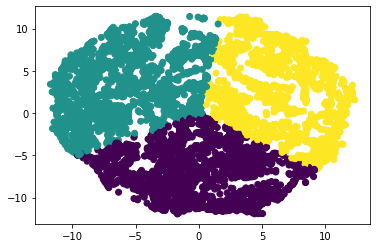

In [158]:
kmedoid = KMedoids(n_clusters=k_kmediod)
labels = kmedoid.fit_predict(TSNE_df)
plt.scatter(TSNE_df['TSNE1'], TSNE_df['TSNE2'],
            c = labels) 
plt.show()

In [159]:
silhouette_score(TSNE_df, labels, metric='euclidean')

0.387844

>> ### 1.3.2. AgglomerativeClustering

>>> #### 1.3.2.1. Choosing Link and Method

In [160]:
links = ['ward', 'complete', 'average', 'single', 'weighted', 'centroid', 'median']
metrics = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation',
        'cosine', 'dice', 'euclidean', 'hamming', 'jaccard',
        'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto',
        'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean']

In [161]:
columns = df_std.columns
met_lin = {}
for metric in metrics:
  for link in links:
    if link == 'ward' and metric != 'euclidean':
            pass
    elif link == 'centroid' and metric != 'euclidean':
        pass
    elif link == 'median' and metric != 'euclidean':
        pass
    else:
      Z = linkage(df_std[columns], metric = metric, method = link)
      c, cop_dist = cophenet(Z, pdist(df_std[columns]))
      if c > 0.75:
        key = metric + " + " + link
        met_lin [key] = c
        print("Metric: "+metric + " and Link: "+link+ " correlation score: "+str(c))


Metric: chebyshev and Link: complete correlation score: 0.8529337868950811
Metric: chebyshev and Link: average correlation score: 0.8520179985849567
Metric: chebyshev and Link: single correlation score: 0.859362451379217
Metric: cityblock and Link: average correlation score: 0.8270675586111426
Metric: cityblock and Link: single correlation score: 0.8055896288891571


/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:1699: RuntimeWarning: invalid value encountered in double_scalars
  c = numerator.sum() / np.sqrt((denomA.sum() * denomB.sum()))


Metric: euclidean and Link: average correlation score: 0.8715777910411995
Metric: euclidean and Link: single correlation score: 0.8503735520224645
Metric: euclidean and Link: centroid correlation score: 0.8661039183223986
Metric: euclidean and Link: median correlation score: 0.7707195542669997
Metric: mahalanobis and Link: average correlation score: 0.7655203225845356
Metric: mahalanobis and Link: single correlation score: 0.7838540100037517
Metric: minkowski and Link: average correlation score: 0.8715777910411997
Metric: minkowski and Link: single correlation score: 0.8503735520224645
Metric: seuclidean and Link: average correlation score: 0.8715777910412004
Metric: seuclidean and Link: single correlation score: 0.8503735520224682
Metric: sqeuclidean and Link: average correlation score: 0.7966664543471859


Observing from score 
Metric: euclidean 
Method: Average

>>> #### 1.3.2.2. Dendrogram

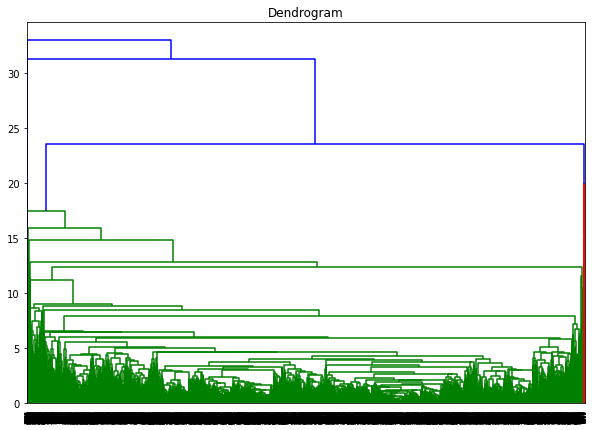

In [162]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = dendrogram(linkage(y=df_std , method='average', metric='euclidean')) 

>>> #### 1.3.3. AgglomerativeClustering  

In [163]:
df_agg = df_clus.copy()
Aggmodel = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'average')
Aggmodel.fit(df_std)
cluster_labels=Aggmodel.labels_
df_agg['Labels'] = cluster_labels

In [164]:
df_agg

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Labels
7340,252.174753,1.000000,411.01,411.01,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,28,1000.0,459.467285,188.121403,0.000000,12,0
8189,28.244252,0.545455,320.00,0.00,320.00,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,1000.0,551.233491,153.094069,0.400000,12,0
6692,942.555708,1.000000,150.00,0.00,150.00,1066.604854,0.333333,0.000000,0.250000,0.083333,4,6,1200.0,1445.633559,492.370581,0.000000,12,0
5213,1064.308102,1.000000,1067.32,242.38,824.94,3608.381870,0.833333,0.250000,0.666667,0.083333,1,13,6000.0,4770.998795,289.339838,0.083333,12,0
5356,200.574081,1.000000,675.90,675.90,0.00,0.000000,0.416667,0.416667,0.000000,0.000000,0,8,7500.0,753.502654,308.604961,0.083333,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1700.753811,1.000000,0.00,0.00,0.00,624.480873,0.000000,0.000000,0.000000,0.500000,9,0,2000.0,418.596666,434.688783,0.000000,12,0
5191,1184.971992,1.000000,0.00,0.00,0.00,4743.715012,0.000000,0.000000,0.000000,0.500000,10,0,3000.0,2355.267462,268.140818,0.000000,12,0
5390,20.700474,0.857143,94.98,0.00,94.98,0.000000,0.857143,0.000000,0.714286,0.000000,0,6,1000.0,86.167530,104.771473,0.500000,7,0
860,5980.582470,1.000000,0.00,0.00,0.00,12008.080790,0.000000,0.000000,0.000000,0.416667,30,0,11000.0,9736.897362,1596.893256,0.083333,12,0


In [165]:
silhouette_score(df_std, df_agg['Labels'], metric='euclidean')

0.7102827042492318

In [166]:
df_agg

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Labels
7340,252.174753,1.000000,411.01,411.01,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,28,1000.0,459.467285,188.121403,0.000000,12,0
8189,28.244252,0.545455,320.00,0.00,320.00,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,1000.0,551.233491,153.094069,0.400000,12,0
6692,942.555708,1.000000,150.00,0.00,150.00,1066.604854,0.333333,0.000000,0.250000,0.083333,4,6,1200.0,1445.633559,492.370581,0.000000,12,0
5213,1064.308102,1.000000,1067.32,242.38,824.94,3608.381870,0.833333,0.250000,0.666667,0.083333,1,13,6000.0,4770.998795,289.339838,0.083333,12,0
5356,200.574081,1.000000,675.90,675.90,0.00,0.000000,0.416667,0.416667,0.000000,0.000000,0,8,7500.0,753.502654,308.604961,0.083333,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1700.753811,1.000000,0.00,0.00,0.00,624.480873,0.000000,0.000000,0.000000,0.500000,9,0,2000.0,418.596666,434.688783,0.000000,12,0
5191,1184.971992,1.000000,0.00,0.00,0.00,4743.715012,0.000000,0.000000,0.000000,0.500000,10,0,3000.0,2355.267462,268.140818,0.000000,12,0
5390,20.700474,0.857143,94.98,0.00,94.98,0.000000,0.857143,0.000000,0.714286,0.000000,0,6,1000.0,86.167530,104.771473,0.500000,7,0
860,5980.582470,1.000000,0.00,0.00,0.00,12008.080790,0.000000,0.000000,0.000000,0.416667,30,0,11000.0,9736.897362,1596.893256,0.083333,12,0


>> ### 1.3.2. DBSCAN

>>> #### 1.3.2.1. Eps_range and MinPoints

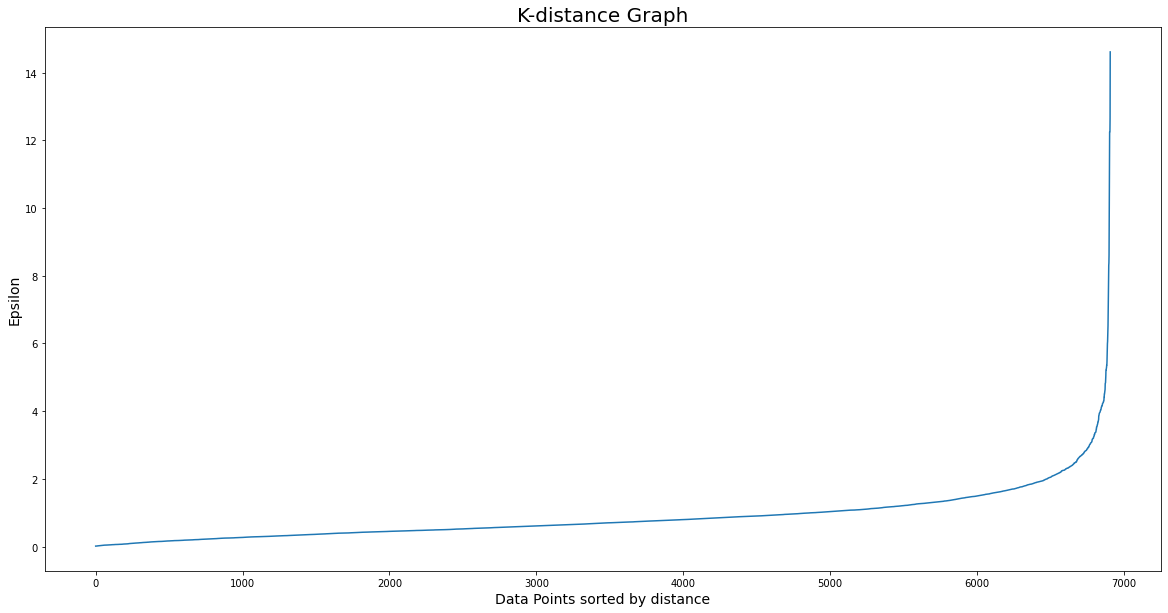

In [167]:
NN_model = NearestNeighbors(n_neighbors=2).fit(df_std)
distances, indices = NN_model.kneighbors(df_std)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()


from the graph we can conculde that most of points (almost 8000) is under eps distance of 2

>>> #### 3.4.2. Choosing eps and minPoints

In [168]:
eps_range = np.arange(0.1, 2, 0.2)
silhouette_avg = []
sil_eps_p = {}
for eps in eps_range:
  for minPoints in range (3, 10): 
    dbscan_model = DBSCAN(eps = eps, min_samples = minPoints).fit(df_std)
    cluster_labels=dbscan_model.labels_
    sil_score = silhouette_score(df_std, cluster_labels)
    silhouette_avg.append(sil_score)
    key = str(eps) +" and "+ str(minPoints)
    sil_eps_p[key] = sil_score
    print("Eps: "+str(eps)+", minPoints: "+str(minPoints) + ", Score: " +str(sil_score)+ ", number of clusters: ", str(len(set(dbscan_model.labels_))))


Eps: 0.1, minPoints: 3, Score: -0.44846299743371965, number of clusters:  28
Eps: 0.1, minPoints: 4, Score: -0.3791010214343905, number of clusters:  18
Eps: 0.1, minPoints: 5, Score: -0.2833093106208627, number of clusters:  7
Eps: 0.1, minPoints: 6, Score: -0.2517236445832539, number of clusters:  3
Eps: 0.1, minPoints: 7, Score: -0.2522611289025643, number of clusters:  3
Eps: 0.1, minPoints: 8, Score: -0.2527557892929204, number of clusters:  3
Eps: 0.1, minPoints: 9, Score: -0.2527557892929204, number of clusters:  3
Eps: 0.30000000000000004, minPoints: 3, Score: -0.4733020108817697, number of clusters:  97
Eps: 0.30000000000000004, minPoints: 4, Score: -0.4254541505935767, number of clusters:  43
Eps: 0.30000000000000004, minPoints: 5, Score: -0.4179059447465682, number of clusters:  28
Eps: 0.30000000000000004, minPoints: 6, Score: -0.41335781207022093, number of clusters:  20
Eps: 0.30000000000000004, minPoints: 7, Score: -0.4037679750671419, number of clusters:  15
Eps: 0.3000

Observing 
eps = 1.9
minPoints = 5

>>> #### 3.4.3. Applying DBSCAN

In [174]:
df_dbscan = df_clus.copy()
eps = 1.9
minPoints = 5
dbscan= DBSCAN(eps = eps, min_samples = minPoints).fit(df_std)
DBSCAN_labels=dbscan.labels_
df_dbscan['clusters'] = DBSCAN_labels

In [175]:
silhouette_score(df_dbscan, DBSCAN_labels)


0.39893380672216755

> ## 1.4. Anomaly Detection Techniques


>> ### 1.4.1. DBSCAN

In [176]:
df_anom = df_clus[DBSCAN_labels==-1]
df_anom

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
111,2392.917738,1.000000,12462.44,12462.44,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,217,2800.0,11628.715570,2000.990921,0.000000,12
8518,72.881984,1.000000,654.84,460.89,193.95,0.000000,1.000000,0.888889,0.888889,0.000000,0,17,1500.0,580.489782,130.035215,0.714286,9
4922,1019.133646,1.000000,9249.73,2326.09,6923.64,0.000000,0.833333,0.583333,0.833333,0.000000,0,96,9000.0,8716.674684,240.332998,0.300000,12
535,3452.538704,1.000000,11681.64,11681.64,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,141,10500.0,8145.713972,1198.614519,0.000000,12
3023,1884.252524,1.000000,1358.88,116.63,1242.25,0.000000,1.000000,0.166667,1.000000,0.000000,0,79,1200.0,303.560901,18959.869380,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2612,5266.121863,1.000000,9030.08,6345.65,2684.43,0.000000,0.916667,0.250000,0.833333,0.000000,0,28,6000.0,7973.983573,6567.292367,0.083333,12
1899,398.341908,0.272727,0.00,0.00,0.00,3623.583341,0.000000,0.000000,0.000000,0.083333,2,0,18000.0,7705.864990,166.965184,0.000000,12
2047,4223.867789,1.000000,2514.74,1597.67,917.07,3444.750251,1.000000,1.000000,0.833333,0.333333,11,53,5500.0,964.935365,1676.595311,0.000000,6
1685,6224.464489,1.000000,4439.11,3884.10,555.01,0.000000,0.833333,0.500000,0.750000,0.000000,0,59,6500.0,2546.344149,4299.471274,0.000000,12


>>  ### 1.4.2.EM

In [177]:
GModel = GaussianMixture(n_components = 2, covariance_type = 'spherical', max_iter = 300, verbose = 1, tol = 0.0001)


In [178]:
df_G = df_clus.copy()
Lables = GModel.fit_predict(df_std)
Score = GModel.score_samples(df_std)
df_G['Labels'] = Lables
df_G

Initialization 0
  Iteration 10
Initialization converged: True


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Labels
7340,252.174753,1.000000,411.01,411.01,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,28,1000.0,459.467285,188.121403,0.000000,12,1
8189,28.244252,0.545455,320.00,0.00,320.00,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,1000.0,551.233491,153.094069,0.400000,12,1
6692,942.555708,1.000000,150.00,0.00,150.00,1066.604854,0.333333,0.000000,0.250000,0.083333,4,6,1200.0,1445.633559,492.370581,0.000000,12,1
5213,1064.308102,1.000000,1067.32,242.38,824.94,3608.381870,0.833333,0.250000,0.666667,0.083333,1,13,6000.0,4770.998795,289.339838,0.083333,12,1
5356,200.574081,1.000000,675.90,675.90,0.00,0.000000,0.416667,0.416667,0.000000,0.000000,0,8,7500.0,753.502654,308.604961,0.083333,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1700.753811,1.000000,0.00,0.00,0.00,624.480873,0.000000,0.000000,0.000000,0.500000,9,0,2000.0,418.596666,434.688783,0.000000,12,1
5191,1184.971992,1.000000,0.00,0.00,0.00,4743.715012,0.000000,0.000000,0.000000,0.500000,10,0,3000.0,2355.267462,268.140818,0.000000,12,1
5390,20.700474,0.857143,94.98,0.00,94.98,0.000000,0.857143,0.000000,0.714286,0.000000,0,6,1000.0,86.167530,104.771473,0.500000,7,0
860,5980.582470,1.000000,0.00,0.00,0.00,12008.080790,0.000000,0.000000,0.000000,0.416667,30,0,11000.0,9736.897362,1596.893256,0.083333,12,0


In [179]:
thr = np.quantile(Score, 0.05)


In [180]:
df_anom = df_G[Score<thr]
df_anom

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Labels
111,2392.917738,1.000000,12462.44,12462.44,0.00,0.00000,0.916667,0.916667,0.000000,0.000000,0,217,2800.0,11628.715570,2000.990921,0.000000,12,0
4922,1019.133646,1.000000,9249.73,2326.09,6923.64,0.00000,0.833333,0.583333,0.833333,0.000000,0,96,9000.0,8716.674684,240.332998,0.300000,12,0
535,3452.538704,1.000000,11681.64,11681.64,0.00,0.00000,1.000000,1.000000,0.000000,0.000000,0,141,10500.0,8145.713972,1198.614519,0.000000,12,0
3023,1884.252524,1.000000,1358.88,116.63,1242.25,0.00000,1.000000,0.166667,1.000000,0.000000,0,79,1200.0,303.560901,18959.869380,0.000000,12,0
247,5265.763713,1.000000,410.24,44.71,365.53,15452.97758,0.916667,0.083333,0.916667,0.333333,13,21,16500.0,12005.307400,1055.547896,0.083333,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.48576,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.694460,1107.030803,0.454545,12,0
161,2881.253586,1.000000,117.00,0.00,117.00,17661.49486,0.250000,0.000000,0.166667,0.750000,28,3,4500.0,17301.832380,931.618475,0.166667,12,0
3943,6629.045062,1.000000,0.00,0.00,0.00,12178.96258,0.000000,0.000000,0.000000,0.833333,31,0,8000.0,10117.711500,2189.436372,0.000000,12,0
2612,5266.121863,1.000000,9030.08,6345.65,2684.43,0.00000,0.916667,0.250000,0.833333,0.000000,0,28,6000.0,7973.983573,6567.292367,0.083333,12,0


>> ### 1.4.3. OneIsolatedForest

In [181]:
Iso = IsolationForest(n_estimators = 100, max_samples = 'auto', contamination = 0.1, max_features = 1)


In [182]:
Labels = Iso.fit_predict(df_std)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


In [183]:
df_anom = df_clus[Labels==-1]
df_anom

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
111,2392.917738,1.0,12462.44,12462.44,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,217,2800.0,11628.715570,2000.990921,0.000000,12
5272,5825.383670,1.0,3426.12,2369.78,1056.34,570.064013,1.000000,0.666667,0.916667,0.166667,2,39,17000.0,2925.020526,1463.588692,0.000000,12
4922,1019.133646,1.0,9249.73,2326.09,6923.64,0.000000,0.833333,0.583333,0.833333,0.000000,0,96,9000.0,8716.674684,240.332998,0.300000,12
535,3452.538704,1.0,11681.64,11681.64,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,141,10500.0,8145.713972,1198.614519,0.000000,12
2860,3586.660250,1.0,342.00,177.00,165.00,5409.095889,0.333333,0.166667,0.166667,0.416667,18,5,6000.0,5949.072074,1315.504162,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3943,6629.045062,1.0,0.00,0.00,0.00,12178.962580,0.000000,0.000000,0.000000,0.833333,31,0,8000.0,10117.711500,2189.436372,0.000000,12
2612,5266.121863,1.0,9030.08,6345.65,2684.43,0.000000,0.916667,0.250000,0.833333,0.000000,0,28,6000.0,7973.983573,6567.292367,0.083333,12
1528,8159.168439,1.0,2453.07,1845.55,607.52,3278.461198,1.000000,0.916667,1.000000,0.250000,3,42,15000.0,1698.958527,2137.893656,0.000000,12
2047,4223.867789,1.0,2514.74,1597.67,917.07,3444.750251,1.000000,1.000000,0.833333,0.333333,11,53,5500.0,964.935365,1676.595311,0.000000,6


> ## 1.5. Final Model


using AgglomerativeClustering sith heighest silhoutte score and clusters = 6

In [184]:
df_test_std = df_test.copy()
columns = df_test_std.columns
df_test_std[columns] = StandardScaler().fit_transform(df_test_std[columns].values)

In [192]:
df_test_label = df_test.copy()
AggModel = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'average')
Labels = AggModel.fit_predict(df_test_std)
df_test_label ['Labels'] = Labels
df_test_label

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Labels
1618,154.439292,1.000000,1047.94,440.00,607.94,0.000000,0.750000,0.083333,0.583333,0.000000,0,17,6000.0,1032.089965,173.484575,0.333333,12,1
2692,467.220993,1.000000,1110.17,640.17,470.00,814.088229,0.416667,0.083333,0.333333,0.250000,3,6,4000.0,2514.118359,185.120378,0.250000,12,1
6107,435.553960,1.000000,1522.06,1372.34,149.72,0.000000,0.833333,0.583333,0.750000,0.000000,0,24,3000.0,1878.606679,162.411202,0.000000,12,1
7960,61.628782,1.000000,457.31,0.00,457.31,0.000000,1.000000,0.000000,0.875000,0.000000,0,9,1500.0,364.254422,112.081828,0.666667,8,1
567,6787.661776,1.000000,99.50,0.00,99.50,7726.511679,0.833333,0.000000,0.750000,0.416667,10,10,8000.0,1775.139580,2293.582697,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,1023.323593,1.000000,253.37,196.37,57.00,0.000000,0.916667,0.500000,0.500000,0.000000,0,16,1200.0,463.956486,250.187987,0.000000,12,1
5874,1363.414177,1.000000,0.00,0.00,0.00,56.326164,0.000000,0.000000,0.000000,0.083333,1,0,1500.0,307.813989,364.040306,0.000000,12,1
7746,251.144969,0.727273,88.51,88.51,0.00,1515.283623,0.250000,0.250000,0.000000,0.416667,7,3,1200.0,1490.675716,189.097848,0.166667,12,1
2252,15532.339720,1.000000,1168.75,0.00,1168.75,3183.037625,0.916667,0.000000,0.916667,0.250000,5,11,16500.0,3906.738592,3379.593046,0.000000,12,1


#### Detecting if there are any anomalies

In [193]:
GModel = GaussianMixture(n_components = 2, covariance_type = 'spherical', max_iter = 300, verbose = 1, tol = 0.0001)
Labels = GModel.fit_predict(df_test_std)
Score = GModel.score_samples(df_std)
df_G['Labels'] = Lables
df_G

Initialization 0
  Iteration 10
Initialization converged: True


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Labels
7340,252.174753,1.000000,411.01,411.01,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,28,1000.0,459.467285,188.121403,0.000000,12,1
8189,28.244252,0.545455,320.00,0.00,320.00,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,1000.0,551.233491,153.094069,0.400000,12,1
6692,942.555708,1.000000,150.00,0.00,150.00,1066.604854,0.333333,0.000000,0.250000,0.083333,4,6,1200.0,1445.633559,492.370581,0.000000,12,1
5213,1064.308102,1.000000,1067.32,242.38,824.94,3608.381870,0.833333,0.250000,0.666667,0.083333,1,13,6000.0,4770.998795,289.339838,0.083333,12,1
5356,200.574081,1.000000,675.90,675.90,0.00,0.000000,0.416667,0.416667,0.000000,0.000000,0,8,7500.0,753.502654,308.604961,0.083333,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1700.753811,1.000000,0.00,0.00,0.00,624.480873,0.000000,0.000000,0.000000,0.500000,9,0,2000.0,418.596666,434.688783,0.000000,12,1
5191,1184.971992,1.000000,0.00,0.00,0.00,4743.715012,0.000000,0.000000,0.000000,0.500000,10,0,3000.0,2355.267462,268.140818,0.000000,12,1
5390,20.700474,0.857143,94.98,0.00,94.98,0.000000,0.857143,0.000000,0.714286,0.000000,0,6,1000.0,86.167530,104.771473,0.500000,7,0
860,5980.582470,1.000000,0.00,0.00,0.00,12008.080790,0.000000,0.000000,0.000000,0.416667,30,0,11000.0,9736.897362,1596.893256,0.083333,12,0


In [194]:
thr = np.quantile(Score, 0.05)
df_anom = df_G[Score<thr]
df_anom

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Labels
111,2392.917738,1.000000,12462.44,12462.44,0.00,0.00000,0.916667,0.916667,0.000000,0.000000,0,217,2800.0,11628.715570,2000.990921,0.000000,12,0
4922,1019.133646,1.000000,9249.73,2326.09,6923.64,0.00000,0.833333,0.583333,0.833333,0.000000,0,96,9000.0,8716.674684,240.332998,0.300000,12,0
535,3452.538704,1.000000,11681.64,11681.64,0.00,0.00000,1.000000,1.000000,0.000000,0.000000,0,141,10500.0,8145.713972,1198.614519,0.000000,12,0
3023,1884.252524,1.000000,1358.88,116.63,1242.25,0.00000,1.000000,0.166667,1.000000,0.000000,0,79,1200.0,303.560901,18959.869380,0.000000,12,0
247,5265.763713,1.000000,410.24,44.71,365.53,15452.97758,0.916667,0.083333,0.916667,0.333333,13,21,16500.0,12005.307400,1055.547896,0.083333,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.48576,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.694460,1107.030803,0.454545,12,0
4859,22.879526,0.833333,171.00,0.00,171.00,0.00000,0.833333,0.000000,0.500000,0.000000,0,7,1500.0,152.517350,85.653871,1.000000,6,0
161,2881.253586,1.000000,117.00,0.00,117.00,17661.49486,0.250000,0.000000,0.166667,0.750000,28,3,4500.0,17301.832380,931.618475,0.166667,12,0
3943,6629.045062,1.000000,0.00,0.00,0.00,12178.96258,0.000000,0.000000,0.000000,0.833333,31,0,8000.0,10117.711500,2189.436372,0.000000,12,0


#### Graph of 6 segments using KernelPCA

In [195]:
kpca_nor = KernelPCA(n_components = 2, kernel = 'rbf').fit_transform(df_nor)
KPCA_df = pd.DataFrame(kpca_nor, columns = ["C1", "C2"])
KPCA_df

,C1,C2
0,0.081323,-0.041090
1,0.021379,-0.231134
2,-0.164563,-0.121490
3,0.169661,0.117999
4,-0.027378,-0.045678
...,...,...
6903,-0.243573,0.072435
6904,-0.223610,0.146178
6905,0.085716,-0.097631
6906,-0.104433,0.265594


In [196]:
KPCA_df.shape
#columns.shape

(6908, 2)

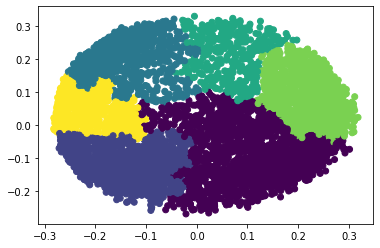

In [197]:
AggModel = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'average')
Labels = AggModel.fit_predict(KPCA_df)
plt.scatter(KPCA_df['C1'], KPCA_df['C2'],
            c = Labels) 
plt.show()

In [198]:
silhouette_score(KPCA_df, labels, metric='euclidean')

0.29110370471496266

>### There are 6 Segements 

>> #### Seg 1

-  Increased balances.
- Average purchases, mainly one-off.
- Low cash advance usage.
- Increased balances compared to their purchases suggest that they tend to carry past balances; this conclusion is also indicated by increased usage of  their limit (balance to credit limit ratio).
- They seem to pay a small amount of their due balance every month, as indicated by the low payments to statement balance ratio. Their ‘‘revolver’’ behavior is also suggested by the fact that they have the lowest percentage of months with full payment of their due balance.

>> #### Seg 2

- Highest cash advance usage in terms of frequency and amount of cash withdrawals.
- Few purchases.
- 85% of their total card spending is attributed to cash advances.
- Highest monthly balance amounts.
- They also present high limit usage.
- they tend to carry past balances and pay only a part of their monthly  balances as indicated by the low frequency of full payments and the similarly low ratio of payments to balance.

>> #### Seg 3


- Highest purchases, in terms of frequency and volume.
- One-off as well as installment purchases.
- Moderate balances and limit usage.
- Their spending is almost exclusively purchases since their cash advance usage is low. 
- Their high payments to balance ratio and frequency of full payments suggest a transactor behavior.

>> #### Seg 4

- Relatively low purchases.
- Their spending is almost exclusively on installments.
- Moderate balances.

>> #### Seg 5

- Lowest purchases and cash advance usage.
- Lowest ratio of balance to credit limit.
- Insignificant (remnant?) balances.

>> #### Seg6

- Increased purchases, including almost exclusively one-off purchases.
- High-value but infrequent purchase transactions: their purchase frequency is
relatively low; however, they have the largest average amount per purchase transaction.
- Moderate balances and credit limit usage.
- They present a transactor behavior.



------



# 02. Scenario 2


In [199]:
Amount_owned = 0.3 * (df ['BALANCE'] / df['CREDIT_LIMIT'])
Pay_hist = 0.35 * (df ['PRC_FULL_PAYMENT'])

In [200]:
df_loan = pd.DataFrame (Amount_owned, columns = ['AMOUNT_OWN'])
df_loan['PAYMENT_HISTORY'] = Pay_hist
df_loan

,AMOUNT_OWN,PAYMENT_HISTORY
0,0.012270,0.000000
1,0.137249,0.077778
2,0.099806,0.000000
3,0.204429,0.000000
4,0.301638,0.000000
...,...,...
8631,0.003523,0.000000
8632,0.008548,0.175000
8633,0.007020,0.087500
8634,0.008075,0.087500


> ## 1.1. Split Data

In [201]:
df_clus, df_test = train_test_split(df_loan, test_size=0.2, random_state=42)


> ## 1.2.  Scaling and Transform

>>### 1.2.1. LogTransform 

In [202]:
df_log = df_clus.copy()
columns = df_log.columns
for col in columns:
  df_log [col] = np.log(df_log[col]+1)

In [203]:
df_log.describe().T

,count,mean,std,min,25%,50%,75%,max
AMOUNT_OWN,6908.0,0.108003,0.095019,0.0,0.01434,0.09083,0.196707,1.753189
PAYMENT_HISTORY,6908.0,0.049873,0.090478,0.0,0.00000,0.00000,0.056695,0.300105


>> ###  1.2.2.  StandardScaler 





In [204]:
df_std = df_clus.copy()
columns = df_std.columns
features = df_std[columns]
df_std[columns] = StandardScaler().fit_transform(df_std[columns].values)


In [205]:
df_std.describe().T

,count,mean,std,min,25%,50%,75%,max
AMOUNT_OWN,6908.0,-4.114318e-18,1.000072,-0.998476,-0.877622,-0.202879,0.820480,38.938866
PAYMENT_HISTORY,6908.0,3.291454e-17,1.000072,-0.537555,-0.537555,-0.537555,0.025529,2.840947


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc26eee7510>,
      dtype=object)

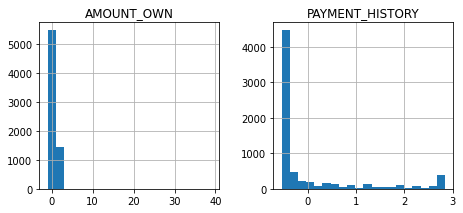

In [206]:
df_std[columns].hist(bins=20, figsize=(20, 15), layout=(4, 5))

>> ### 1.2.3. MinMaxScaler

In [207]:
df_minmax = df_clus.copy()
columns = df_minmax.columns
df_minmax[columns] = MinMaxScaler().fit_transform(df_minmax[columns].values)


In [208]:
df_minmax.describe().T

,count,mean,std,min,25%,50%,75%,max
AMOUNT_OWN,6908.0,0.025001,0.025041,0.0,0.003026,0.019921,0.045545,1.0
PAYMENT_HISTORY,6908.0,0.159111,0.296011,0.0,0.000000,0.000000,0.166667,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc269b176d0>,
      dtype=object)

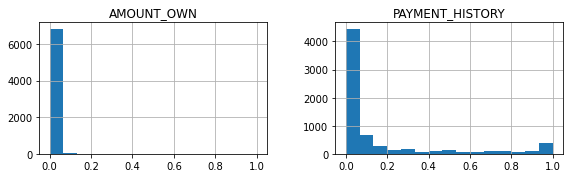

In [209]:

df_minmax[columns].hist(bins=15, figsize=(20, 15), layout=(5, 4))

>> ### 1.2.4. RobustScaler  

In [210]:
df_robust = df_clus.copy()
columns = df_robust.columns
df_robust[columns] = RobustScaler().fit_transform(df_robust[columns].values)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc26ab15a10>,
      dtype=object)

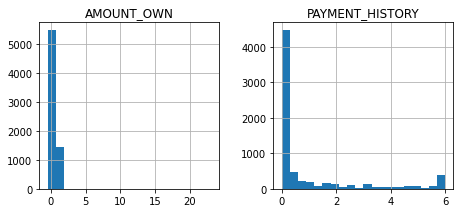

In [211]:
# Histogram 
df_robust[columns].hist(bins=20, figsize=(20, 15), layout=(4, 5))

In [212]:
df_robust.describe().T

,count,mean,std,min,25%,50%,75%,max
AMOUNT_OWN,6908.0,0.119474,0.588935,-0.468521,-0.397351,0.0,0.602649,23.050287
PAYMENT_HISTORY,6908.0,0.954661,1.776060,0.000000,0.000000,0.0,1.000000,5.999988


> ## 1.3. Clustering Techniques

using StandardScaled Data

>> ### 1.3.1. KMeans 




>>> #### 1.3.1.1. Applying Elbow Method

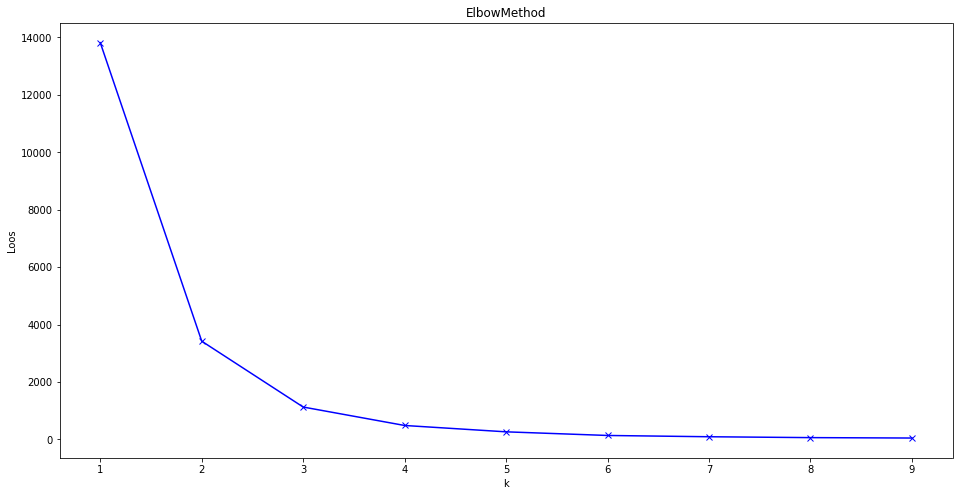

In [213]:
loss = []
K = range(1,10)
for k in K:
    kmean = KMeans(n_clusters=k).fit(df_std)
    loss_int = (kmean.inertia_)/k
    loss.append(loss_int)
plt.figure(figsize=(16,8))
plt.plot(K, loss, 'bx-')
plt.xlabel('k')
plt.ylabel('Loos')
plt.title('ElbowMethod')
plt.show()


Observing from the graph:
k = 3

In [214]:
k_kmeans = 3

>>> #### 3.1.1.2. KMeans



In [215]:
df_kmeans = df_clus.copy()
kmean = KMeans(n_clusters=k_kmeans)
labels = kmean.fit_predict(df_std)


In [216]:
df_kmeans['Labels'] = labels
df_kmeans

,AMOUNT_OWN,PAYMENT_HISTORY,Labels
7340,0.075652,0.000000,2
8189,0.008473,0.140000,2
6692,0.235639,0.000000,0
5213,0.053215,0.029167,2
5356,0.008023,0.029167,2
...,...,...,...
5734,0.255113,0.000000,0
5191,0.118497,0.000000,2
5390,0.006210,0.175000,1
860,0.163107,0.029167,0


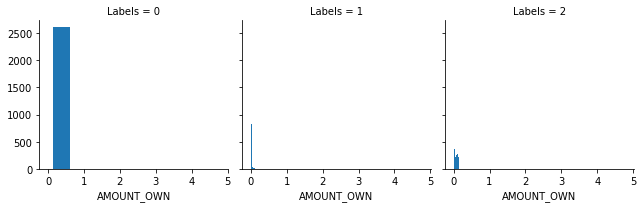

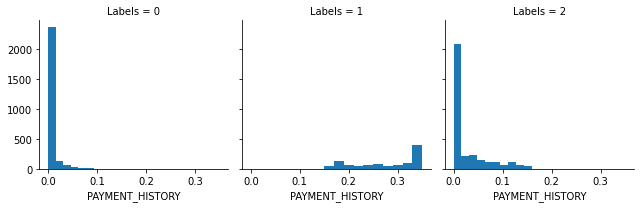

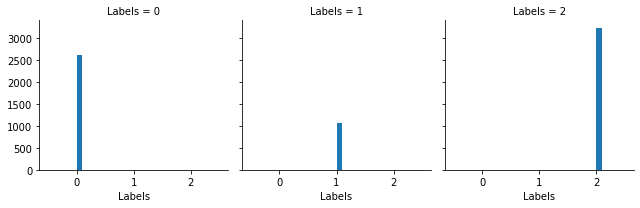

In [217]:
for c in df_kmeans:
    grid= sns.FacetGrid(df_kmeans, col='Labels')
    grid.map(plt.hist, c)

In [218]:
silhouette_score(df_std, df_kmeans['Labels'], metric='euclidean')

0.5967825829966944

>>> #### 3.1.1.3. Visualization for Kmeans using PCA

In [219]:
df_nor = normalize(df_std)
pca_nor = PCA(n_components = 2).fit_transform(df_nor)
PCA_df = pd.DataFrame(pca_nor, columns = ["C1", "C2"])
PCA_df

,C1,C2
0,0.222795,-0.752906
1,1.070911,0.482518
2,-0.898699,0.209826
3,0.715962,-0.548813
4,0.837230,-0.436944
...,...,...
6903,-0.898602,0.272539
6904,-0.344777,-0.655584
6905,1.018758,0.636439
6906,-0.890023,0.104881


In [220]:
PCA_df.shape


(6908, 2)

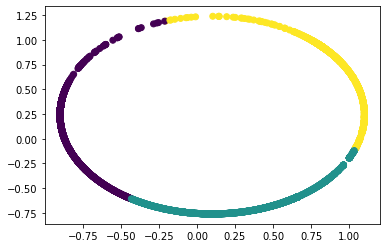

In [221]:
kmean = KMeans(n_clusters=k_kmeans)
labels = kmean.fit_predict(pca_nor)
plt.scatter(PCA_df['C1'], PCA_df['C2'],
            c = labels) 
plt.show()

In [222]:
silhouette_score(PCA_df, labels, metric='euclidean')

0.6896753708027421

>>> #### 3.1.1.3. Visualization for Kmeans using PCA

In [223]:
kpca_nor = KernelPCA(n_components = 2, kernel = 'rbf').fit_transform(df_nor)
KPCA_df = pd.DataFrame(kpca_nor, columns = ["C1", "C2"])
KPCA_df

,C1,C2
0,-0.287440,-0.546854
1,-0.584373,0.509591
2,0.633660,0.086795
3,-0.533955,-0.362609
4,-0.577584,-0.254948
...,...,...
6903,0.634683,0.113705
6904,0.113445,-0.443643
6905,-0.551312,0.594845
6906,0.623072,0.039058


In [224]:
KPCA_df.shape
#columns.shape

(6908, 2)

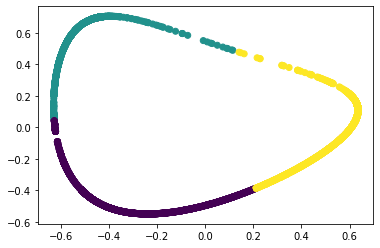

In [225]:
kmean = KMeans(n_clusters=k_kmeans)
labels = kmean.fit_predict(kpca_nor)
plt.scatter(KPCA_df['C1'], KPCA_df['C2'],
            c = labels) 
plt.show()

In [226]:
silhouette_score(KPCA_df, labels, metric='euclidean')

0.7444776647550008

>>> #### 3.1.1.3. Visualization for Kmeans using TSNE

In [227]:
tsne_nor = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(df_nor)
TSNE_df = pd.DataFrame(tsne_nor, columns = ["TSNE1", "TSNE2"])
TSNE_df

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6908 samples in 0.003s...
[t-SNE] Computed neighbors for 6908 samples in 0.109s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6908
[t-SNE] Computed conditional probabilities for sample 2000 / 6908
[t-SNE] Computed conditional probabilities for sample 3000 / 6908
[t-SNE] Computed conditional probabilities for sample 4000 / 6908
[t-SNE] Computed conditional probabilities for sample 5000 / 6908
[t-SNE] Computed conditional probabilities for sample 6000 / 6908
[t-SNE] Computed conditional probabilities for sample 6908 / 6908
[t-SNE] Mean sigma: 0.001922
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.174858
[t-SNE] KL divergence after 300 iterations: 1.392983


,TSNE1,TSNE2
0,-5.812793,-3.582730
1,-16.210283,-1.017427
2,7.644739,6.171239
3,-1.677699,-0.337571
4,-0.872503,2.298216
...,...,...
6903,9.184864,11.538981
6904,8.235512,2.813780
6905,-4.280660,-14.042225
6906,-10.168689,6.008942


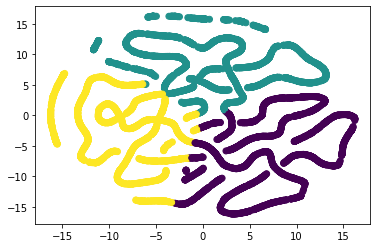

In [228]:
kmeans = KMeans(n_clusters=k_kmeans)
labels = kmeans.fit_predict(TSNE_df)
plt.scatter(TSNE_df['TSNE1'], TSNE_df['TSNE2'],
            c = labels) 
plt.show()

In [229]:
silhouette_score(TSNE_df, labels, metric='euclidean')

0.37342235

>> ### 1.3.2. Kmedoids 

>>> #### 1.3.2.1. Applying Elbow Method

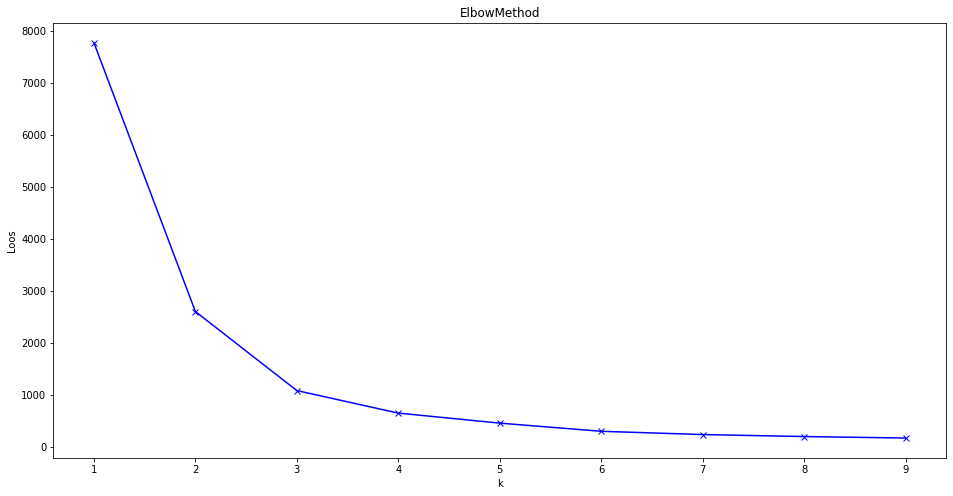

In [230]:
loss = []
K = range(1,10)
for k in K:
    kmean = KMedoids(n_clusters=k).fit(df_std)
    loss_int = (kmean.inertia_)/k
    loss.append(loss_int)
plt.figure(figsize=(16,8))
plt.plot(K, loss, 'bx-')
plt.xlabel('k')
plt.ylabel('Loos')
plt.title('ElbowMethod')
plt.show()


Observing from the graph:
k = 3

In [231]:
k_kmediod = 3

>>> #### 1.3.2.1 KMeans



In [232]:
df_kmediod = df_clus.copy()
kmedoid = KMedoids(n_clusters=k_kmediod)
labels = kmedoid.fit_predict(df_std)


In [233]:
df_kmediod['Labels'] = labels
df_kmediod

,AMOUNT_OWN,PAYMENT_HISTORY,Labels
7340,0.075652,0.000000,1
8189,0.008473,0.140000,0
6692,0.235639,0.000000,2
5213,0.053215,0.029167,1
5356,0.008023,0.029167,1
...,...,...,...
5734,0.255113,0.000000,2
5191,0.118497,0.000000,1
5390,0.006210,0.175000,0
860,0.163107,0.029167,2


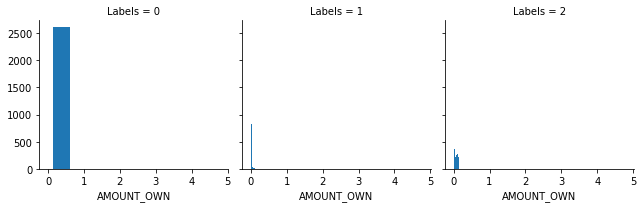

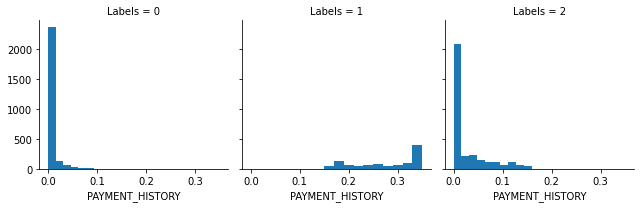

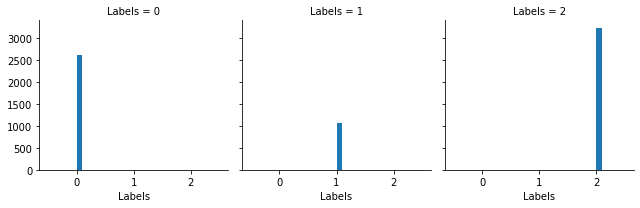

In [234]:
for c in df_kmediod:
    grid= sns.FacetGrid(df_kmeans, col='Labels')
    grid.map(plt.hist, c)

In [235]:
silhouette_score(df_std, df_kmediod['Labels'], metric='euclidean')

0.5976807827166574

>>> #### 3.1.1.3. Visualization for Kmeans using PCA

In [236]:
df_nor = normalize(df_std)
pca_nor = PCA(n_components = 2).fit_transform(df_nor)
PCA_df = pd.DataFrame(pca_nor, columns = ["C1", "C2"])
PCA_df

,C1,C2
0,0.222795,-0.752906
1,1.070911,0.482518
2,-0.898699,0.209826
3,0.715962,-0.548813
4,0.837230,-0.436944
...,...,...
6903,-0.898602,0.272539
6904,-0.344777,-0.655584
6905,1.018758,0.636439
6906,-0.890023,0.104881


In [237]:
PCA_df.shape


(6908, 2)

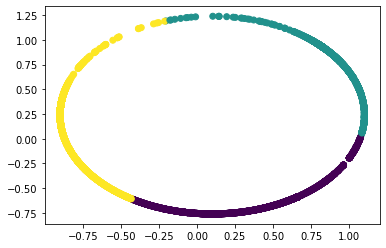

In [238]:
kmedoid = KMedoids(n_clusters=k_kmediod)
labels = kmedoid.fit_predict(pca_nor)
plt.scatter(PCA_df['C1'], PCA_df['C2'],
            c = labels) 
plt.show()

In [239]:
silhouette_score(PCA_df, labels, metric='euclidean')

0.6900893073898434

>>> #### 3.1.1.3. Visualization for Kmeans using PCA

In [240]:
kpca_nor = KernelPCA(n_components = 2, kernel = 'rbf').fit_transform(df_nor)
KPCA_df = pd.DataFrame(kpca_nor, columns = ["C1", "C2"])
KPCA_df

,C1,C2
0,-0.287440,-0.546854
1,-0.584373,0.509591
2,0.633660,0.086795
3,-0.533955,-0.362609
4,-0.577584,-0.254948
...,...,...
6903,0.634683,0.113705
6904,0.113445,-0.443643
6905,-0.551312,0.594845
6906,0.623072,0.039058


In [241]:
KPCA_df.shape
#columns.shape

(6908, 2)

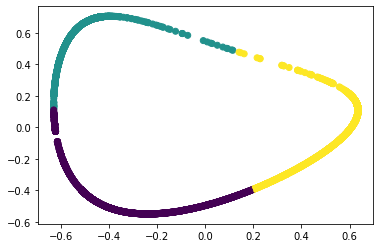

In [242]:
kmedoid = KMedoids(n_clusters=k_kmediod)
labels = kmedoid.fit_predict(kpca_nor)
plt.scatter(KPCA_df['C1'], KPCA_df['C2'],
            c = labels) 
plt.show()

In [243]:
silhouette_score(KPCA_df, labels, metric='euclidean')

0.7444989388447475

>>> #### 3.1.1.3. Visualization for Kmeans using TSNE

In [244]:
tsne_nor = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(df_nor)
TSNE_df = pd.DataFrame(tsne_nor, columns = ["TSNE1", "TSNE2"])
TSNE_df

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6908 samples in 0.004s...
[t-SNE] Computed neighbors for 6908 samples in 0.174s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6908
[t-SNE] Computed conditional probabilities for sample 2000 / 6908
[t-SNE] Computed conditional probabilities for sample 3000 / 6908
[t-SNE] Computed conditional probabilities for sample 4000 / 6908
[t-SNE] Computed conditional probabilities for sample 5000 / 6908
[t-SNE] Computed conditional probabilities for sample 6000 / 6908
[t-SNE] Computed conditional probabilities for sample 6908 / 6908
[t-SNE] Mean sigma: 0.001922
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.626110
[t-SNE] KL divergence after 300 iterations: 1.378865


,TSNE1,TSNE2
0,-8.099466,10.859918
1,7.041006,6.948157
2,-14.807561,-1.221864
3,5.551894,9.358808
4,3.238099,13.222819
...,...,...
6903,-1.263238,-5.382807
6904,-0.236533,15.858646
6905,-1.041874,-12.775945
6906,-5.337742,6.936367


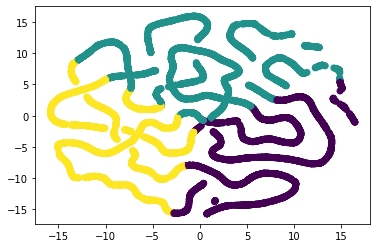

In [245]:
kmedoid = KMedoids(n_clusters=k_kmediod)
labels = kmedoid.fit_predict(TSNE_df)
plt.scatter(TSNE_df['TSNE1'], TSNE_df['TSNE2'],
            c = labels) 
plt.show()

In [246]:
silhouette_score(TSNE_df, labels, metric='euclidean')

0.361729

>> ### 1.3.2. AgglomerativeClustering

>>> #### 1.3.2.1. Choosing Link and Method

In [247]:
links = ['ward', 'complete', 'average', 'single', 'weighted', 'centroid', 'median']
metrics = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation',
        'cosine', 'dice', 'euclidean', 'hamming', 'jaccard',
        'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto',
        'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean']

In [248]:
columns = df_std.columns
met_lin = {}
for metric in metrics:
  for link in links:
    if link == 'ward' and metric != 'euclidean':
            pass
    elif link == 'centroid' and metric != 'euclidean':
        pass
    elif link == 'median' and metric != 'euclidean':
        pass
    else:
      Z = linkage(df_std[columns], metric = metric, method = link)
      c, cop_dist = cophenet(Z, pdist(df_std[columns]))
      if c > 0.75:
        key = metric + " + " + link
        met_lin [key] = c
        print("Metric: "+metric + " and Link: "+link+ " correlation score: "+str(c))


Metric: chebyshev and Link: complete correlation score: 0.8261596135928273
Metric: chebyshev and Link: average correlation score: 0.9026536977771907
Metric: cityblock and Link: average correlation score: 0.8477275552000143
Metric: cityblock and Link: weighted correlation score: 0.8419173717215698


/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:1699: RuntimeWarning: invalid value encountered in double_scalars
  c = numerator.sum() / np.sqrt((denomA.sum() * denomB.sum()))


Metric: euclidean and Link: complete correlation score: 0.8372669662810454
Metric: euclidean and Link: average correlation score: 0.9020422422779055
Metric: euclidean and Link: centroid correlation score: 0.9034806266807388
Metric: euclidean and Link: median correlation score: 0.8704592919000029
Metric: mahalanobis and Link: complete correlation score: 0.8481044525576911
Metric: mahalanobis and Link: average correlation score: 0.8999408274868305
Metric: mahalanobis and Link: weighted correlation score: 0.818212229739892
Metric: minkowski and Link: complete correlation score: 0.8372669662810454
Metric: minkowski and Link: average correlation score: 0.9020422422779055
Metric: seuclidean and Link: complete correlation score: 0.8372669662810456
Metric: seuclidean and Link: average correlation score: 0.9020422422779061


Observing from score 
Metric: euclidean 
Method: Average

>>> #### 1.3.2.2. Dendrogram

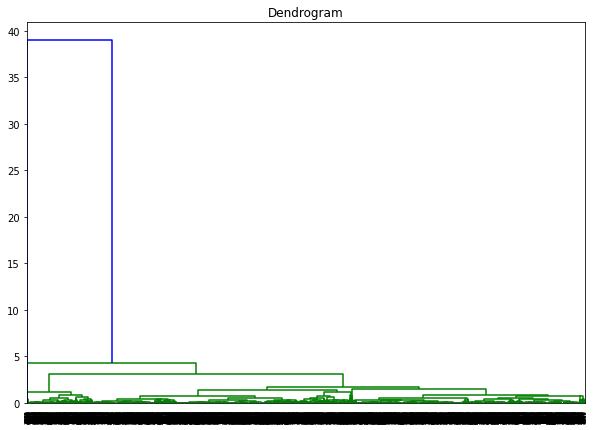

In [249]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = dendrogram(linkage(y=df_std , method='average', metric='euclidean')) 

>>> #### 1.3.3. AgglomerativeClustering  

In [250]:
df_agg = df_clus.copy()
Aggmodel = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'average')
Aggmodel.fit(df_std)
cluster_labels=Aggmodel.labels_
df_agg['Labels'] = cluster_labels

In [251]:
df_agg

,AMOUNT_OWN,PAYMENT_HISTORY,Labels
7340,0.075652,0.000000,0
8189,0.008473,0.140000,0
6692,0.235639,0.000000,4
5213,0.053215,0.029167,0
5356,0.008023,0.029167,0
...,...,...,...
5734,0.255113,0.000000,4
5191,0.118497,0.000000,0
5390,0.006210,0.175000,0
860,0.163107,0.029167,4


In [252]:
silhouette_score(df_std, df_agg['Labels'], metric='euclidean')

0.5158629921246575

In [253]:
df_agg

,AMOUNT_OWN,PAYMENT_HISTORY,Labels
7340,0.075652,0.000000,0
8189,0.008473,0.140000,0
6692,0.235639,0.000000,4
5213,0.053215,0.029167,0
5356,0.008023,0.029167,0
...,...,...,...
5734,0.255113,0.000000,4
5191,0.118497,0.000000,0
5390,0.006210,0.175000,0
860,0.163107,0.029167,4


>> ### 1.3.2. DBSCAN

>>> #### 1.3.2.1. Eps_range and MinPoints

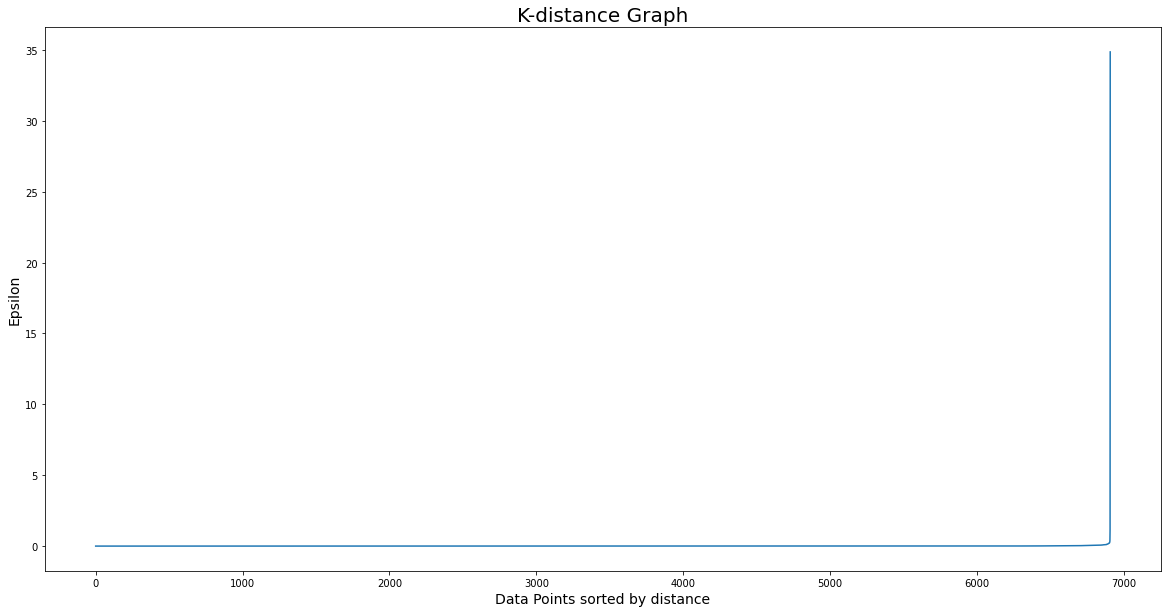

In [254]:
NN_model = NearestNeighbors(n_neighbors=2).fit(df_std)
distances, indices = NN_model.kneighbors(df_std)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()


from the graph we can conculde that most of points (almost 8000) is under eps distance of 2

>>> #### 3.4.2. Choosing eps and minPoints

In [255]:
eps_range = np.arange(0.1, 2, 0.2)
silhouette_avg = []
sil_eps_p = {}
for eps in eps_range:
  for minPoints in range (3, 10): 
    dbscan_model = DBSCAN(eps = eps, min_samples = minPoints).fit(df_std)
    cluster_labels=dbscan_model.labels_
    sil_score = silhouette_score(df_std, cluster_labels)
    silhouette_avg.append(sil_score)
    key = str(eps) +" and "+ str(minPoints)
    sil_eps_p[key] = sil_score
    print("Eps: "+str(eps)+", minPoints: "+str(minPoints) + ", Score: " +str(sil_score)+ ", number of clusters: ", str(len(set(dbscan_model.labels_))))


Eps: 0.1, minPoints: 3, Score: -0.14286118749982699, number of clusters:  21
Eps: 0.1, minPoints: 4, Score: -0.08071834148907762, number of clusters:  15
Eps: 0.1, minPoints: 5, Score: -0.09390742713529233, number of clusters:  14
Eps: 0.1, minPoints: 6, Score: -0.09426253610271075, number of clusters:  14
Eps: 0.1, minPoints: 7, Score: -0.09960911760979207, number of clusters:  14
Eps: 0.1, minPoints: 8, Score: -0.06631946658957555, number of clusters:  13
Eps: 0.1, minPoints: 9, Score: -0.06635590149704008, number of clusters:  13
Eps: 0.30000000000000004, minPoints: 3, Score: 0.26061143744526766, number of clusters:  4
Eps: 0.30000000000000004, minPoints: 4, Score: 0.3824657439786942, number of clusters:  3
Eps: 0.30000000000000004, minPoints: 5, Score: 0.7606688773927082, number of clusters:  2
Eps: 0.30000000000000004, minPoints: 6, Score: 0.7442027435580092, number of clusters:  2
Eps: 0.30000000000000004, minPoints: 7, Score: 0.7282625491505945, number of clusters:  2
Eps: 0.300

Observing 
eps = 1.9
minPoints = 5

>>> #### 3.4.3. Applying DBSCAN

In [257]:
df_dbscan = df_clus.copy()
eps = 1.9
minPoints = 5
dbscan= DBSCAN(eps = eps, min_samples = minPoints).fit(df_std)
DBSCAN_labels=dbscan.labels_
df_dbscan['clusters'] = DBSCAN_labels

In [258]:
silhouette_score(df_dbscan, DBSCAN_labels)


0.9633181373585885

> ## 1.4. Anomaly Detection Techniques


>> ### 1.4.1. DBSCAN

In [259]:
df_anom = df_clus[DBSCAN_labels==-1]
df_anom

,AMOUNT_OWN,PAYMENT_HISTORY
6726,4.772985,0.155555


>>  ### 1.4.2.EM

In [260]:
GModel = GaussianMixture(n_components = 2, covariance_type = 'spherical', max_iter = 300, verbose = 1, tol = 0.0001)


In [261]:
df_G = df_clus.copy()
Lables = GModel.fit_predict(df_std)
Score = GModel.score_samples(df_std)
df_G['Labels'] = Lables
df_G

Initialization 0
  Iteration 10
Initialization converged: True


,AMOUNT_OWN,PAYMENT_HISTORY,Labels
7340,0.075652,0.000000,0
8189,0.008473,0.140000,0
6692,0.235639,0.000000,0
5213,0.053215,0.029167,0
5356,0.008023,0.029167,0
...,...,...,...
5734,0.255113,0.000000,0
5191,0.118497,0.000000,0
5390,0.006210,0.175000,0
860,0.163107,0.029167,0


In [262]:
thr = np.quantile(Score, 0.05)


In [263]:
df_anom = df_G[Score<thr]
df_anom

,AMOUNT_OWN,PAYMENT_HISTORY,Labels
8518,0.014576,0.250000,1
6594,0.112545,0.350000,1
1221,0.001164,0.190909,0
473,0.002136,0.233333,0
3023,0.471063,0.000000,0
...,...,...,...
1636,0.005181,0.190909,0
7989,0.032703,0.254546,1
5486,0.009016,0.210000,0
7513,0.007380,0.233333,0


>> ### 1.4.3. OneIsolatedForest

In [264]:
Iso = IsolationForest(n_estimators = 100, max_samples = 'auto', contamination = 0.1, max_features = 1)


In [265]:
Labels = Iso.fit_predict(df_std)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


In [266]:
df_anom = df_clus[Labels==-1]
df_anom

,AMOUNT_OWN,PAYMENT_HISTORY
397,0.196329,0.043750
1566,0.015707,0.320833
8518,0.014576,0.250000
4922,0.033971,0.105000
6594,0.112545,0.350000
...,...,...
5276,0.026424,0.070000
8529,0.033611,0.350000
7989,0.032703,0.254546
5486,0.009016,0.210000


> ## 1.5. Final Model
using Kmeans with KernelPCA

In [267]:
df_test_std = df_test.copy()
columns = df_test_std.columns
df_test_std[columns] = StandardScaler().fit_transform(df_test_std[columns].values)

In [268]:
kmean = KMeans(n_clusters=4)
labels = kmean.fit_predict(df_test_std)

In [269]:
silhouette_score(df_test_std, labels, metric='euclidean')

0.5564749785337009

In [270]:
df_test_label = df_test.copy()
df_test_label ['Labels'] = labels


In [271]:
df_test_label

,AMOUNT_OWN,PAYMENT_HISTORY,Labels
1618,0.007722,0.116667,1
2692,0.035042,0.087500,1
6107,0.043555,0.000000,1
7960,0.012326,0.233333,2
567,0.254537,0.000000,0
...,...,...,...
852,0.255831,0.000000,0
5874,0.272683,0.000000,0
7746,0.062786,0.058333,1
2252,0.282406,0.000000,0


In [272]:
df_nor = normalize(df_test_std)
KPCA_nor = KernelPCA(n_components = 2, kernel = 'rbf').fit_transform(df_nor)


In [273]:
df_KPCA = pd.DataFrame(KPCA_nor, columns = ["C1", "C2"])
df_KPCA


,C1,C2
0,-0.617357,0.363620
1,-0.630795,0.252779
2,-0.454452,-0.479848
3,-0.501539,0.646508
4,0.636679,0.110067
...,...,...
1723,0.636572,0.111467
1724,0.634490,0.127582
1725,-0.629933,-0.019693
1726,0.632901,0.135372


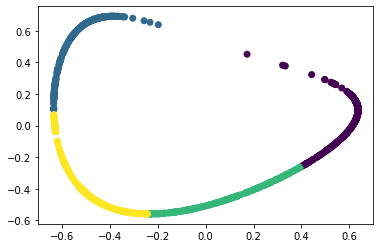

In [274]:
kmean = KMeans(n_clusters=4)
labels = kmean.fit_predict(df_KPCA)
plt.scatter(df_KPCA['C1'], df_KPCA['C2'],
            c = labels) 
plt.show()

In [275]:
silhouette_score(df_KPCA, labels, metric='euclidean')

0.7056890603820013

#### Detecting if there are any anomalies

In [276]:
GModel = GaussianMixture(n_components = 2, covariance_type = 'spherical', max_iter = 300, verbose = 1, tol = 0.0001)
Labels = GModel.fit_predict(df_test_std)
Score = GModel.score_samples(df_std)
df_G['Labels'] = Lables
df_G

Initialization 0
  Iteration 10
  Iteration 20
Initialization converged: True


,AMOUNT_OWN,PAYMENT_HISTORY,Labels
7340,0.075652,0.000000,0
8189,0.008473,0.140000,0
6692,0.235639,0.000000,0
5213,0.053215,0.029167,0
5356,0.008023,0.029167,0
...,...,...,...
5734,0.255113,0.000000,0
5191,0.118497,0.000000,0
5390,0.006210,0.175000,0
860,0.163107,0.029167,0


In [277]:
thr = np.quantile(Score, 0.05)
df_anom = df_G[Score<thr]
df_anom

,AMOUNT_OWN,PAYMENT_HISTORY,Labels
4671,0.017227,0.35,1
6838,0.000876,0.35,1
3023,0.471063,0.00,0
6859,0.002311,0.35,1
447,0.005716,0.35,1
...,...,...,...
3242,0.002748,0.35,1
7858,0.001519,0.35,1
7035,0.003271,0.35,1
4859,0.004576,0.35,1


##### There are 4 Segements 
- 0 -> for no loan 
- 3 -> for 15% loan offer
- 1 -> for 10% loan offer
- 2 -> for 5%  loan offer 